# Ablation: Semi-Supervised Architope - for Reviews
---
- This code Implements Algorithm 3.2 of the "PC-NNs" paper.

#### Mode: Code-Testin Parameter(s)

In [1]:
trial_run = True

### Meta-parameters

In [2]:
# Test-size Ratio
test_size_ratio = 1-(1/24)
min_width = 10
min_epochs = 150
# Ablation Finess
N_plot_finess = 5
# min_parts_threshold = .001; max_parts_threshold = 0.9
N_min_parts = 1; N_max_plots = 5
Tied_Neurons_Q = True
# Partition with Inputs (determine parts with domain) or outputs (determine parts with image)
Partition_using_Inputs = True
# Cuttoff Level
gamma = .5
# Softmax Layer instead of sigmoid
softmax_layer = True #<- Just out of curiosity...but it doesn't perform many better IRL

In [3]:
#------------------------------------#
# Only For Motivational Example Only #
#------------------------------------#
## Hyperparameters
percentage_in_row = .25
N = 10**4

def f_1(x):
    return 1 + np.sin(10*x)
def f_2(x):
    return -2 -np.exp(x)
x_0 = 0
x_end = 1
import seaborn as sns

### Hyperparameters

Only turn of if running code directly here, typically this script should be run be called by other notebooks.  

In [4]:
# load dataset
results_path = "./outputs/models/"
results_tables_path = "./outputs/results/"
raw_data_path_folder = "./inputs/raw/"
data_path_folder = "./inputs/data/"

### Import

Using TensorFlow backend.


Deep Feature Builder - Ready
Deep Classifier - Ready
1
Training Data size:  416


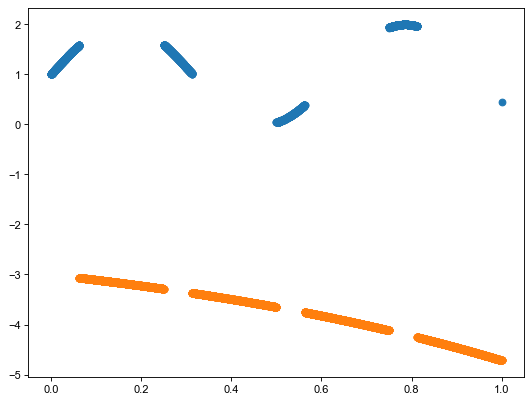

In [5]:
# Load Packages/Modules
exec(open('Init_Dump.py').read())
# Load Hyper-parameter Grid
exec(open('Grid_Enhanced_Network.py').read())
# Load Helper Function(s)
exec(open('Helper_Functions.py').read())
# Pre-process Data
if Option_Function != "Motivational_Example": 
    exec(open('Financial_Data_Preprocessor.py').read())
else:
    print(1)
    exec(open('Motivational_Example.py').read())
    print("Training Data size: ",X_train.shape[0])
# exec(open('Prepare_Data_California_Housing.py').read())
# Import time separately
import time

# TEMP
# import pickle_compat
# pickle_compat.patch()
# param_grid_Vanilla_Nets['input_dim']=X_train.shape[1]
sns.set()
plt.show()


### Set Seed

In [6]:
random.seed(2021)
tf.random.set_seed(2021)

#### Pre-Process:
- Convert Categorical Variables to Dummies
- Remove Bad Column
- Perform Training/Test Split

# Random Lipschitz Partition Builder

We implement the random paritioning method of [Yair Bartal](https://scholar.google.com/citations?user=eCXP24kAAAAJ&hl=en):
- [On approximating arbitrary metrices by tree metrics](https://dl.acm.org/doi/10.1145/276698.276725)

The algorithm is summarized as follow:

---

## Algorithm:
 1. Sample $\alpha \in [4^{-1},2^{-1}]$ randomly and uniformly,
 2. Apply a random suffle of the data, (a random bijection $\pi:\{i\}_{i=1}^X \rightarrow \mathbb{X}$),
 3. For $i = 1,\dots,I$:
   - Set $K_i\triangleq B\left(\pi(i),\alpha \Delta \right) - \bigcup_{j=1}^{i-1} P_j$
 
 4. Remove empty members of $\left\{K_i\right\}_{i=1}^X$.  
 
 **Return**: $\left\{K_i\right\}_{i=1}^{\tilde{X}}$.  
 
 For more details on the random-Lipschitz partition of Yair Bartal, see this [well-written blog post](https://nickhar.wordpress.com/2012/03/26/lecture-22-random-partitions-of-metric-spaces/).

## Define Random Partition Builder

#### Explicit Partion Builder:
Implements exactly Algorithm 2:

In [7]:
def Random_Lipschitz_Partioner(X_in,
                               y_in,
                               N_parts_to_get=4):

    # Compute Size of each part
    size_part_reference = int(round(X_in.shape[0]/N_parts_to_get))

    # Apply random bijection #
    #------------------------#
    ## Get random bijection indices
    random_bijection_indices = np.random.choice(range(X_in.shape[0]),size=X_in.shape[0], replace=False)
    ## Apply random bijections
    X_in_shuffled = X_in[random_bijection_indices,:]
    y_in_shuffled = y_in[random_bijection_indices,:]

    # Initialize Lists #
    #------------------#
    X_parts = []
    y_parts = []

    for i_th_part_to_get in range(N_parts_to_get):
        # Build random balls #
        #--------------------#
        ## Sample random radius
        size_part = int(np.maximum(1,np.round(size_part_reference*np.random.uniform(low=.5,high=1.5,size=1)[0])))
        ## Sample random point
        X_center_loop_index = np.random.choice(range(X_in_shuffled.shape[0]),size=1, replace=False)
        X_center_loop = X_in_shuffled[X_center_loop_index,:]
        ## Compute Typical Distances from Center
        distances_loop = X_center_loop-X_in_shuffled
        distances_loop = np.linalg.norm(distances_loop, axis=1)

        # Remove Random Ball from Dataset
        if size_part <= len(distances_loop):
            ## Identify indices
            indices_smallest_to_random_ball = np.argsort(distances_loop)[:size_part]
        else:
            print('Final Loop')
            indices_smallest_to_random_ball = np.array(range(X_in_shuffled.shape[0]))
        ## Extract Parts
        X_current_part_loop = X_in_shuffled[indices_smallest_to_random_ball,:]
        y_current_part_loop = y_in_shuffled[indices_smallest_to_random_ball,:]
        ## Append to List of Parts
        X_parts.append(X_current_part_loop)
        y_parts.append(y_current_part_loop)

        # Remove Selected Entries From Array #
        #------------------------------------#
        X_in_shuffled = np.delete(X_in_shuffled,indices_smallest_to_random_ball,axis=0)
        y_in_shuffled = np.delete(y_in_shuffled,indices_smallest_to_random_ball,axis=0)

        # Failsafe if procedure has terminated
        if X_in_shuffled.shape[0] == 0:
            print('breaking early')
            break
    # Count Number of Parts Generated        
    N_parts_generated = len(X_parts)
    # Output Parts
    return X_parts, y_parts, N_parts_generated

# Ablation Function

In [71]:
build_ffNN_random(X_train,X_test,y_train,param_grid_Vanilla_Nets)

NameError: name 'N_parameters_trained' is not defined

In [70]:
def build_ffNN_random(X_train_in,X_test_in,y_train_in,param_grid_in):
    # Initializations
    ## Model
    clf = linear_model.Lasso(alpha=0.1)
    ## Features to Randomize
    X_train_rand_features = X_train_in.to_numpy()
    X_test_rand_features = X_test_in.to_numpy()
    N_Random_Features = param_grid_in['height'][0]
    N_Random_Features_Depth = param_grid_in['depth'][0]
    for depth in range(N_Random_Features_Depth):
        # Get Random Features
        #---------------------------------------------------------------------------------------------------#
        Weights_rand = randsp(m=(X_train_rand_features.shape[1]),n=N_Random_Features,density = 0.75)
        biases_rand = np.random.uniform(low=-.5,high=.5,size = N_Random_Features)
        ### Apply Random (hidden) Weights
        X_train_rand_features = sparse.csr_matrix.dot(X_train_rand_features,Weights_rand)
        #### Apply Random (hidden) Biases
        X_train_rand_features = X_train_rand_features + biases_rand
        X_train_rand_features = np.sin(X_train_rand_features)
        #### Compress
        X_train_rand_features = sparse.csr_matrix(X_train_rand_features)

        #------# Test #-------------#
        #### Apply Random (hidden) Weights
        X_test_rand_features = sparse.csr_matrix.dot(X_test_rand_features,Weights_rand) 
        #### Apply Random (hidden) Biases
        X_test_rand_features = X_test_rand_features + biases_rand
        #### Apply Discontinuous (Step) Activation function
        X_test_rand_features = np.sin(X_test_rand_features)
        #### Compress
        X_test_rand_features = sparse.csr_matrix(X_train_rand_features)
    # Get regressor 
    clf.fit(X_train_rand_features,y_train_in)
    y_hat_train = clf.predict(X_train_rand_features)
    ### Predict
    y_hat_test = clf.predict(X_test_rand_features)
    
    # Count Parameters
    N_parameters = (N_Random_Features * N_Random_Features_Depth) + N_Random_Features*(param_grid_in['input_dim'][0]+param_grid_in['output_dim'][0])
    # Return Computations
    return y_hat_train, y_hat_test, N_parameters

In [8]:
def get_PCNNs(N_parts,X_train,y_train,X_test,y_test):

    # Initialization(s) #
    #-------------------#
    N_neurons = 0
    L_timer = 0
    P_timer = 0
    Mean_Width_Subnetworks = 0

    # Partitioner Begin #
    #-------------------#
    import time
    partitioning_time_begin = time.time()
    print('-------------------------------------------------------')
    print('Randomly Initialized Parts - Via Randomized Algorithm 2')
    print('-------------------------------------------------------')
    if Partition_using_Inputs == True:
        X_parts_list, y_parts_list, N_parts_Generated_by_Algo_2 = Random_Lipschitz_Partioner(X_train.to_numpy(),
                                                                                             y_train.reshape(-1,1),
                                                                                             N_parts)
    else:
        X_parts_list, y_parts_list, N_parts_Generated_by_Algo_2 = Random_Lipschitz_Partioner(y_train.reshape(-1,1),
                                                                                             X_train.to_numpy(),
                                                                                             N_parts)
    partitioning_time = time.time() - partitioning_time_begin
    print('The_parts_listhe number of parts are: ' + str(N_parts_Generated_by_Algo_2)+'.')
    ############# Partitioner End ########

    print('-----------------------------------------------------')
    print('Training Sub-Networks on Each Randomly Generated Part')
    print('-----------------------------------------------------')
    # Time-Elapse (Start) for Training on Each Part #
    PCNN_timer = time.time(); PCNN_timer = -math.inf; N_params_Architope = 0; N_params_tally = 0
    # Remove Eager Execution Error(s)
    tf.compat.v1.disable_eager_execution()
    # Automatically Initialize Correct Input/Output Dimension(s)
    param_grid_Vanilla_Nets['input_dim'] = [X_train.shape[1]]; param_grid_Vanilla_Nets['output_dim'] = [1]
    param_grid_Deep_Classifier['input_dim'] = [X_train.shape[1]]
    # Decide if/or not to tie neuron numbers of sub-patterns together
    if Tied_Neurons_Q == True:
        param_grid_Vanilla_Nets['height'] = [int(np.maximum(round(param_grid_Vanilla_Nets['height'][0]/N_parts),min_width))]
        param_grid_Vanilla_Nets['epochs'] = [int(np.maximum(round(param_grid_Vanilla_Nets['epochs'][0]/int(round(np.sqrt(N_parts)))),min_epochs))]
#         param_grid_Deep_Classifier['height'] = [int(np.maximum(round(param_grid_Deep_Classifier['height'][0]/N_parts),min_width))]

    for current_part in range(N_parts_Generated_by_Algo_2):
        # Update User #
        #-------------#
        print('-----------------------------------------------------------')
        print('Currently Training Part: '+str(current_part)+'/'+str(N_parts_Generated_by_Algo_2 )+'Total Parts.')
        print('-----------------------------------------------------------')

        # Timer for Part
        part_training_timer = time.time()
        # Get Data for Sub-Pattern
        X_loop = pd.DataFrame(X_parts_list[current_part])
        y_loop = (y_parts_list[current_part]).reshape(-1,)
        # Train ffNN
        if randomize_subpattern_construction == False:
            y_hat_part_loop, y_hat_part_loop_test, N_neurons_PCNN_loop = build_ffNN(n_folds = 4, 
                                                                                  n_jobs = n_jobs,
                                                                                  n_iter = n_iter, 
                                                                                  param_grid_in = param_grid_Vanilla_Nets, 
                                                                                  X_train= X_loop, 
                                                                                  y_train=y_loop,
                                                                                  X_test_partial=X_train,
                                                                                  X_test=X_test,
                                                                                  NOCV=True)
        else:
            y_hat_part_loop, y_hat_part_loop_test, N_neurons_PCNN_loop = build_ffNN_random(X_loop,X_test,y_train,param_grid_Vanilla_Nets)
        # Reshape y
        ## Training
        y_train.shape = (y_train.shape[0], param_grid_Vanilla_Nets['output_dim'][0])
        y_hat_part_loop.shape = (y_hat_part_loop.shape[0], param_grid_Vanilla_Nets['output_dim'][0])
        ## Testing
        y_test.shape = (y_test.shape[0], param_grid_Vanilla_Nets['output_dim'][0])
        y_hat_part_loop_test.shape = (y_hat_part_loop_test.shape[0], param_grid_Vanilla_Nets['output_dim'][0])

        # Append predictions to data-frames
        ## If first prediction we initialize data-frames
        if current_part==0:
            # Register quality
            training_quality = np.array(np.abs(y_hat_part_loop-y_train)).reshape(y_hat_part_loop.shape[0],1)

            # Save Predictions
            predictions_train = y_hat_part_loop.reshape(y_hat_part_loop.shape[0],1)
            predictions_test = y_hat_part_loop_test.reshape(y_hat_part_loop_test.shape[0],1)


        ## If not first prediction we append to already initialized dataframes
        else:
        # Register Best Scores
            #----------------------#
            # Write Predictions 
            # Save Predictions
            y_hat_train_loop = y_hat_part_loop.reshape(predictions_train.shape[0],1)
            predictions_train = np.append(predictions_train,y_hat_train_loop,axis=1)
            y_hat_test_loop = y_hat_part_loop_test.reshape(predictions_test.shape[0],1)
            predictions_test = np.append(predictions_test,y_hat_test_loop,axis=1)

            # Evaluate Errors #
            #-----------------#
            # Training
            prediction_errors = np.abs(y_hat_train_loop-y_train)
            training_quality = np.append(training_quality,prediction_errors.reshape(training_quality.shape[0],1),axis=1)

        #==============================#
        # Update Performance Metric(s) #
        #==============================#
        part_training_timer = time.time() - part_training_timer
        # L-Time
        L_timer += partitioning_time
        # P-Time
        P_timer = max(P_timer,part_training_timer)
        # N. Params
        N_neurons += N_neurons_PCNN_loop
        # Mean Width for Sub-Network(s)
        Mean_Width_Subnetworks += param_grid_Vanilla_Nets['height'][0]

    # Take Mean of Width(s)
    Mean_Width_Subnetworks = Mean_Width_Subnetworks/N_parts_Generated_by_Algo_2
    print('-----------------------')
    print('Training Deep Zero-Sets')
    print('-----------------------')


    # Time Elapsed for Training Deep Zero-Sets
    Deep_Zero_Sets_timer = time.time()

    ## Initialize Classes Labels
    if softmax_layer == False:
        # No pooling (classical)
        partition_labels_training_integers = np.argmin(training_quality,axis=-1)
    else:
        # Max Pooling
#         partition_labels_training_integers = (training_quality == training_quality.min(axis=1)[:,None]).astype(int)
        partition_labels_training_integers = np.apply_along_axis(softminn, 1, training_quality).astype(int)
    partition_labels_training = pd.DataFrame(pd.DataFrame(partition_labels_training_integers) == 0)
    ## Build Classes
    for part_column_i in range(1,(training_quality.shape[1])):
        partition_labels_training = pd.concat([partition_labels_training,
                                               (pd.DataFrame(partition_labels_training_integers) == part_column_i)
                                              ],axis=1)
    ## Convert to integers
    partition_labels_training = partition_labels_training+0
    ## Train simple deep classifier
    tf.compat.v1.disable_eager_execution()
    predicted_classes_train, predicted_classes_test, N_params_deep_classifier = build_simple_deep_classifier(n_folds = CV_folds, 
                                                                                                        n_jobs = n_jobs, 
                                                                                                        n_iter =n_iter, 
                                                                                                        param_grid_in=param_grid_Deep_Classifier, 
                                                                                                        X_train = X_train.values, 
                                                                                                        y_train = partition_labels_training.values,
                                                                                                        X_test = X_test.values)
    # Get Binary Classes (Discontinuous Unit)
    ## Training Set
    predicted_classes_train = ((predicted_classes_train>gamma)*1).astype(int)
    ## Testing Set
    predicted_classes_test = ((predicted_classes_test > gamma)*1).astype(int)
    # Get PC-NN Prediction(s)
    ## Train
    PCNN_prediction_y_train = (predictions_train*predicted_classes_train).sum(axis=1)
    ## Test
    PCNN_prediction_y_test = (predictions_test*predicted_classes_test).sum(axis=1)

    # End Timer
    Deep_Zero_Sets_timer = time.time() - Deep_Zero_Sets_timer

    print('-----------------------------------')
    print('Computing Final Performance Metrics')
    print('-----------------------------------')
    # Time-Elapsed Training Deep Classifier

    # Update Times
    L_timer +=Deep_Zero_Sets_timer
    P_timer +=Deep_Zero_Sets_timer
    # Update Number of Neurons Used
    N_neurons_subPatterns = N_neurons
    N_neurons_deep_Zero_Sets = (param_grid_Deep_Classifier['height'][0])*(param_grid_Deep_Classifier['depth'][0])
    N_neurons = N_neurons_deep_Zero_Sets + N_neurons_subPatterns



    # Compute Peformance
    performance_PCNN = reporter(y_train_hat_in=PCNN_prediction_y_train,y_test_hat_in=PCNN_prediction_y_test,
                                y_train_in=y_train,
                                y_test_in=y_test)
    # Write Performance
    performance_PCNN.to_latex((results_tables_path+"PCNN_full_performance.tex"))

    # Update User
    print(performance_PCNN)

    ### Model Complexity/Efficiency Metrics
    # Build AIC-like Metric #
    #-----------------------#
    AIC_like = 2*(N_neurons - np.log((performance_PCNN['test']['MAE'])))
    AIC_like = np.round(AIC_like,3)
    Efficiency = np.log(N_neurons) *(performance_PCNN['test']['MAE'])
    Efficiency = np.round(Efficiency,3)


    # Build Table #
    #-------------#
    PCNN_Model_Complexity = pd.DataFrame({'L-time': [L_timer],
                                               'P-time':[P_timer],
                                               'N_params_expt': [N_neurons],
                                               'AIC-like': [AIC_like],
                                               'Eff': [Efficiency],
                                               'N. Parts':[N_parts_Generated_by_Algo_2]})


    # Write Required Training Time(s)
    PCNN_Model_Complexity.to_latex((results_tables_path+"PCNN_full_model_complexities.tex"))

    #--------------======---------------#
    # Display Required Training Time(s) #
    #--------------======---------------#
    print(PCNN_Model_Complexity)
    
    
    
    #########################################
    for j in range(10):
        print('#------------------------------#')
    #########################################
    print('# ---- Getting Benchmarks ---- #')
    #########################################
    for j in range(10):
        print('#------------------------------#')
    #########################################
    print('Training PCNN-lgt')
    # Time-Elapsed Training linear classifier
    Architope_logistic_classifier_training_begin = time.time()
    if N_parts > 1:
        parameters = {'penalty': ['none'], 'C': [0.1]}
        lr = LogisticRegression(random_state=2020)
        cv = RepeatedStratifiedKFold(n_splits=CV_folds, 
                                     n_repeats=n_iter, random_state=0)
        classifier = RandomizedSearchCV(lr, 
                                        parameters, 
                                        random_state=2020)

        # Initialize Classes Labels
        partition_labels_training = np.argmin(training_quality,axis=-1)
        # Train Logistic Classifier #
        #---------------------------#
        # Supress warnings caused by "ignoring C" for 'none' penalty and similar obvious warnings
        warnings.simplefilter("ignore")
        # Train Classifier
        classifier.fit(X_train, partition_labels_training)
    if N_parts >1 :
        #### Write Predicted Class(es)
        # Training Set
        predicted_classes_train_logistic_BM = classifier.best_estimator_.predict(X_train)
        Architope_prediction_y_train_logistic_BM = np.take_along_axis(predictions_train, predicted_classes_train_logistic_BM[:,None], axis=1)
        # Testing Set
        predicted_classes_test_logistic_BM = classifier.best_estimator_.predict(X_test)
        Architope_prediction_y_test_logistic_BM = np.take_along_axis(predictions_test, 
                                                                     predicted_classes_test_logistic_BM[:,None], 
                                                                     axis=1)
    else:
        #### Write Predicted Class(es)
        # Training Set
        Architope_prediction_y_train_logistic_BM = predictions_train
        # Testing Set
        Architope_prediction_y_test_logistic_BM = predictions_test    
    # Extract Number of Parameters Logistic Regressor
    if N_parts > 1:
        N_params_best_logistic = (classifier.best_estimator_.coef_.shape[0])*(classifier.best_estimator_.coef_.shape[1]) + len(classifier.best_estimator_.intercept_)
    else:
        N_params_best_logistic = 1
    N_params_best_logistic = N_params_best_logistic + N_neurons_subPatterns*N_parts    
    # Time-Elapsed Training linear classifier
    Architope_logistic_classifier_training = time.time() - Architope_logistic_classifier_training_begin
    #### Compute Performance
    # Compute Peformance
    performance_architope_ffNN_logistic = reporter(y_train_hat_in=Architope_prediction_y_train_logistic_BM,
                                        y_test_hat_in=Architope_prediction_y_test_logistic_BM,
                                        y_train_in=y_train,
                                        y_test_in=y_test)
    # Write Performance
    performance_architope_ffNN_logistic.to_latex((results_tables_path+"Architopes_logistic_performance.tex"))
    
    ##### --- #####
    print('Training PCNN-Bagged')
    ##### --- #####
    # Time for Bagging
    Bagging_ffNN_bagging_time_begin = time.time()
    # Train Bagging Weights in-sample
    bagging_coefficients = LinearRegression().fit(predictions_train,y_train)
    # Predict Bagging Weights out-of-sample
    bagged_prediction_train = bagging_coefficients.predict(predictions_train)
    bagged_prediction_test = bagging_coefficients.predict(predictions_test)
    # Write number of trainable bagging parameters
    N_bagged_parameters = len(bagging_coefficients.coef_) + 1
    # Time for Bagging
    Bagging_ffNN_bagging_time = time.time() - Bagging_ffNN_bagging_time_begin
    # Compute Peformance
    performance_bagged_ffNN = reporter(y_train_hat_in=bagged_prediction_train,
                                        y_test_hat_in=bagged_prediction_test,
                                        y_train_in=y_train,
                                        y_test_in=y_test)
    # Write Performance
    performance_bagged_ffNN.to_latex((results_tables_path+"ffNN_Bagged.tex"))
    
    for jj in range(5):
        print('-----------------------')
    print('...Returning Results...')
    for jj in range(5):
        print('-----------------------')
    # Return Output(s)
    return performance_PCNN, PCNN_Model_Complexity, N_parts_Generated_by_Algo_2, N_neurons, N_neurons_subPatterns,N_neurons_deep_Zero_Sets, Mean_Width_Subnetworks, performance_architope_ffNN_logistic, N_params_best_logistic, performance_bagged_ffNN, Bagging_ffNN_bagging_time, Architope_logistic_classifier_training, Deep_Zero_Sets_timer

---
# Perform Ablation:
---

In [9]:
# Initialize 
# q_implicit_N_parts_possibilities = np.linspace(min_parts_threshold,max_parts_threshold,N_plot_finess)
N_parts_possibilities = np.unique(np.round(np.linspace(N_min_parts,N_max_plots,num=N_plot_finess))).astype(int)
# Custom: N_parts_possibilities = np.array([1,2,200]); N_plot_finess = len(N_parts_possibilities)

# Get Performance Metric
for inplicit_N_parts_loop in range(len(N_parts_possibilities)):
    ### UPDATE USER ###
    for k in range(10):
        print('--------------------------------------')
    print('Ablation Completion Percentage:',(inplicit_N_parts_loop/N_plot_finess))
    for k in range(10):
        print('--------------------------------------')
    
    # Implicitly Set: Current Number of Parts
#     q_implicit_N_parts_loop = q_implicit_N_parts_possibilities[inplicit_N_parts_loop]
    N_parts_possibilities_loop = N_parts_possibilities[inplicit_N_parts_loop]
    # Run Algos. 1+2
    performance_Architope_loop, Architope_Model_Complexity_full_loop, N_parts_Generated_by_Algo_2_loop, N_params_architope_loop, N_neurons_subPatterns_loop, N_neurons_deep_Zero_Sets_loop, height_mean_loop, performance_PCNN_ffNN_logistic_loop, N_params_PCNN_logistic_loop,performance_bagged_ffNN_loop, baggin_time_loop, logistic_time_loop, Deep_Zero_Sets_timer_loop = get_PCNNs(N_parts_possibilities_loop,X_train,y_train,X_test,y_test)
    # Reshape
    performance_Architope_loop = performance_Architope_loop.to_numpy().reshape([3,2,1])
    Architope_Model_Complexity_full_loop = Architope_Model_Complexity_full_loop.to_numpy().reshape([1,6,1])
    performance_PCNN_ffNN_logistic_loop = performance_PCNN_ffNN_logistic_loop.to_numpy().reshape([3,2,1])
    performance_bagged_ffNN_loop = performance_bagged_ffNN_loop.to_numpy().reshape([3,2,1])
    # Record
    if inplicit_N_parts_loop == 0:
        # Don't count partitioner if only one parts is active!
        if N_parts_possibilities_loop <= 1:
            Architope_Model_Complexity_full_loop[:,1] = Architope_Model_Complexity_full_loop[:,0]
            N_neurons_deep_Zero_Sets_loop = 0
        # Record Model Complexities Otherwise    
        performance_Architope_history = performance_Architope_loop
        Architope_Model_Complexity_history = Architope_Model_Complexity_full_loop
        N_parts_Generated_by_Algo_2_history = N_parts_Generated_by_Algo_2_loop
        N_params_subPatterns_hist = N_neurons_subPatterns_loop
        N_neurons_deep_Zero_Sets_hist = N_neurons_deep_Zero_Sets_loop
        N_params_architope_hist = N_neurons_deep_Zero_Sets_loop + N_neurons_subPatterns_loop
        height_mean_hist = height_mean_loop
        N_neurons_per_input = N_neurons_deep_Zero_Sets_loop + int(round(N_neurons_subPatterns_loop/N_parts_possibilities_loop))
        ### BENCHMARKs
        ### Logistic PCNN
        performance_PCNN_ffNN_logistic_hist = performance_PCNN_ffNN_logistic_loop
        N_params_PCNN_logistic_hist = N_params_PCNN_logistic_loop
        logistic_time_hist =  logistic_time_loop
        baggin_time_hist = baggin_time_loop
        ### Bagged PCNNs
        performance_bagged_ffNN_hist = performance_bagged_ffNN_loop
        ### Misc
        Deep_Zero_Sets_timer_hist = Deep_Zero_Sets_timer_loop
    else:
        performance_Architope_history = np.concatenate((performance_Architope_history,performance_Architope_loop),axis=2)
        Architope_Model_Complexity_history = np.concatenate((Architope_Model_Complexity_history,Architope_Model_Complexity_full_loop),axis=2)
        N_parts_Generated_by_Algo_2_history = np.append(N_parts_Generated_by_Algo_2_history,N_parts_Generated_by_Algo_2_loop)
        N_params_architope_hist = np.append(N_params_architope_hist,N_params_architope_loop)
        N_params_subPatterns_hist = np.append(N_params_subPatterns_hist,N_neurons_subPatterns_loop)
        N_neurons_deep_Zero_Sets_hist = np.append(N_neurons_deep_Zero_Sets_hist,N_neurons_deep_Zero_Sets_loop)
        height_mean_hist = np.append(height_mean_hist,height_mean_loop)
        N_neurons_per_input = np.append(N_neurons_per_input,(N_neurons_deep_Zero_Sets_loop + int(round(N_neurons_subPatterns_loop/N_parts_possibilities_loop))))
        ### Logistic PCNN
        performance_PCNN_ffNN_logistic_hist = np.concatenate((performance_PCNN_ffNN_logistic_hist,
                                                              performance_PCNN_ffNN_logistic_loop),
                                                             axis=2)
        N_params_PCNN_logistic_hist = np.append(N_params_PCNN_logistic_hist,N_params_PCNN_logistic_loop)
        logistic_time_hist = np.append(logistic_time_hist,logistic_time_loop)
        ### Bagged Performance
        performance_bagged_ffNN_hist = np.concatenate((performance_bagged_ffNN_hist,
                                                       performance_bagged_ffNN_loop),
                                                      axis=2)
        baggin_time_hist = np.append(baggin_time_hist,baggin_time_loop)
        ### Misc
        Deep_Zero_Sets_timer_hist = np.append(Deep_Zero_Sets_timer_hist,Deep_Zero_Sets_timer_loop)

--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
Ablation Completion Percentage: 0.0
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
-------------------------------------------------------
Randomly Initialized Parts - Via Randomized Algorithm 2
-------------------------------------------------------
The_parts_listhe

299/299 [==============================] - 0s 33us/sample - loss: 0.9335 - mse: 4.5011 - mae: 0.9335 - mape: 237.2532
Epoch 51/150
299/299 [==============================] - 0s 37us/sample - loss: 0.9119 - mse: 4.5052 - mae: 0.9119 - mape: 237.2327
Epoch 52/150
299/299 [==============================] - 0s 42us/sample - loss: 0.9354 - mse: 4.4716 - mae: 0.9354 - mape: 236.3893
Epoch 53/150
299/299 [==============================] - 0s 45us/sample - loss: 0.9733 - mse: 4.5120 - mae: 0.9733 - mape: 241.0119
Epoch 54/150
299/299 [==============================] - 0s 38us/sample - loss: 0.9085 - mse: 4.4958 - mae: 0.9085 - mape: 236.7431
Epoch 55/150
299/299 [==============================] - 0s 38us/sample - loss: 0.9262 - mse: 4.5090 - mae: 0.9262 - mape: 238.4866
Epoch 56/150
299/299 [==============================] - 0s 36us/sample - loss: 0.9552 - mse: 4.5125 - mae: 0.9552 - mape: 239.0123
Epoch 57/150
299/299 [==============================] - 0s 37us/sample - loss: 0.9449 - mse: 4.4

299/299 [==============================] - 0s 37us/sample - loss: 0.9400 - mse: 4.4793 - mae: 0.9400 - mape: 238.1487
Epoch 113/150
299/299 [==============================] - 0s 36us/sample - loss: 0.9294 - mse: 4.4949 - mae: 0.9294 - mape: 237.0227
Epoch 114/150
299/299 [==============================] - 0s 37us/sample - loss: 0.9164 - mse: 4.5074 - mae: 0.9164 - mape: 238.0206
Epoch 115/150
299/299 [==============================] - 0s 37us/sample - loss: 0.9124 - mse: 4.4768 - mae: 0.9124 - mape: 236.5019
Epoch 116/150
299/299 [==============================] - 0s 35us/sample - loss: 0.9362 - mse: 4.4438 - mae: 0.9362 - mape: 236.7723
Epoch 117/150
299/299 [==============================] - 0s 38us/sample - loss: 0.9426 - mse: 4.4847 - mae: 0.9426 - mape: 237.3678
Epoch 118/150
299/299 [==============================] - 0s 38us/sample - loss: 0.9321 - mse: 4.5061 - mae: 0.9321 - mape: 237.4337
Epoch 119/150
299/299 [==============================] - 0s 41us/sample - loss: 0.9162 - m

/Users/kratsi0000/opt/anaconda3/envs/bpcnn/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/kratsi0000/opt/anaconda3/envs/bpcnn/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/150
172/172 [==============================] - 0s 1ms/sample - loss: 2.9333 - mse: 9.8100 - mae: 2.9333 - mape: 127.3954
Epoch 2/150
172/172 [==============================] - 0s 43us/sample - loss: 1.7233 - mse: 6.1286 - mae: 1.7233 - mape: 334.3359
Epoch 3/150
172/172 [==============================] - 0s 48us/sample - loss: 1.4983 - mse: 5.6739 - mae: 1.4983 - mape: 365.3695
Epoch 4/150
172/172 [==============================] - 0s 44us/sample - loss: 1.3946 - mse: 6.5363 - mae: 1.3946 - mape: 395.4017
Epoch 5/150
172/172 [==============================] - 0s 41us/sample - loss: 1.3783 - mse: 6.6649 - mae: 1.3783 - mape: 395.9731
Epoch 6/150
172/172 [==============================] - 0s 42us/sample - loss: 1.3680 - mse: 6.4952 - mae: 1.3680 - mape: 392.3421
Epoch 7/150
172/172 [==============================] - 0s 41us/sample - loss: 1.3553 - mse: 6.4880 - mae: 1.3553 - mape: 394.2294
Epoch 8/150
172/172 [==============================] - 0s 45us/sample - loss: 1.3287 - mse:

172/172 [==============================] - 0s 45us/sample - loss: 1.3015 - mse: 6.6485 - mae: 1.3015 - mape: 389.5811
Epoch 64/150
172/172 [==============================] - 0s 41us/sample - loss: 1.3555 - mse: 6.3797 - mae: 1.3555 - mape: 381.5254
Epoch 65/150
172/172 [==============================] - 0s 41us/sample - loss: 1.3549 - mse: 6.5237 - mae: 1.3549 - mape: 385.9941
Epoch 66/150
172/172 [==============================] - 0s 37us/sample - loss: 1.3504 - mse: 6.4571 - mae: 1.3504 - mape: 386.8681
Epoch 67/150
172/172 [==============================] - 0s 40us/sample - loss: 1.3069 - mse: 6.5587 - mae: 1.3069 - mape: 386.7346
Epoch 68/150
172/172 [==============================] - 0s 38us/sample - loss: 1.3209 - mse: 6.5244 - mae: 1.3209 - mape: 387.5927
Epoch 69/150
172/172 [==============================] - 0s 42us/sample - loss: 1.3739 - mse: 6.6020 - mae: 1.3739 - mape: 386.2242
Epoch 70/150
172/172 [==============================] - 0s 44us/sample - loss: 1.3415 - mse: 6.3

172/172 [==============================] - 0s 73us/sample - loss: 1.3249 - mse: 6.4731 - mae: 1.3249 - mape: 384.1487
Epoch 126/150
172/172 [==============================] - 0s 65us/sample - loss: 1.3294 - mse: 6.4091 - mae: 1.3294 - mape: 383.5948
Epoch 127/150
172/172 [==============================] - 0s 58us/sample - loss: 1.3682 - mse: 6.6048 - mae: 1.3682 - mape: 390.8680
Epoch 128/150
172/172 [==============================] - 0s 43us/sample - loss: 1.3584 - mse: 6.6035 - mae: 1.3584 - mape: 391.1165
Epoch 129/150
172/172 [==============================] - 0s 55us/sample - loss: 1.3611 - mse: 6.3913 - mae: 1.3611 - mape: 381.9900
Epoch 130/150
172/172 [==============================] - 0s 47us/sample - loss: 1.3436 - mse: 6.4450 - mae: 1.3436 - mape: 385.8930
Epoch 131/150
172/172 [==============================] - 0s 65us/sample - loss: 1.3334 - mse: 6.6213 - mae: 1.3334 - mape: 389.4620
Epoch 132/150
172/172 [==============================] - 0s 52us/sample - loss: 1.3156 - m

119/119 [==============================] - 0s 46us/sample - loss: 1.2256 - mse: 5.5779 - mae: 1.2256 - mape: 92.5110
Epoch 37/150
119/119 [==============================] - 0s 45us/sample - loss: 1.2427 - mse: 5.5228 - mae: 1.2427 - mape: 92.7090
Epoch 38/150
119/119 [==============================] - 0s 47us/sample - loss: 1.2323 - mse: 5.6113 - mae: 1.2323 - mape: 92.8668
Epoch 39/150
119/119 [==============================] - 0s 50us/sample - loss: 1.2256 - mse: 5.5581 - mae: 1.2256 - mape: 92.3933
Epoch 40/150
119/119 [==============================] - 0s 43us/sample - loss: 1.2257 - mse: 5.6388 - mae: 1.2257 - mape: 92.8147
Epoch 41/150
119/119 [==============================] - 0s 58us/sample - loss: 1.2249 - mse: 5.6438 - mae: 1.2249 - mape: 92.8140
Epoch 42/150
119/119 [==============================] - 0s 45us/sample - loss: 1.2222 - mse: 5.5922 - mae: 1.2222 - mape: 92.4771
Epoch 43/150
119/119 [==============================] - 0s 54us/sample - loss: 1.2184 - mse: 5.5981 - m

119/119 [==============================] - 0s 46us/sample - loss: 1.2286 - mse: 5.6131 - mae: 1.2286 - mape: 92.7562
Epoch 100/150
119/119 [==============================] - 0s 58us/sample - loss: 1.2385 - mse: 5.4940 - mae: 1.2385 - mape: 92.4414
Epoch 101/150
119/119 [==============================] - 0s 47us/sample - loss: 1.2488 - mse: 5.6547 - mae: 1.2488 - mape: 93.5695
Epoch 102/150
119/119 [==============================] - 0s 67us/sample - loss: 1.2935 - mse: 5.2665 - mae: 1.2935 - mape: 92.7748
Epoch 103/150
119/119 [==============================] - 0s 73us/sample - loss: 1.2505 - mse: 5.6470 - mae: 1.2505 - mape: 93.6103
Epoch 104/150
119/119 [==============================] - 0s 46us/sample - loss: 1.2575 - mse: 5.4618 - mae: 1.2575 - mape: 92.7666
Epoch 105/150
119/119 [==============================] - 0s 47us/sample - loss: 1.2461 - mse: 5.5602 - mae: 1.2461 - mape: 92.9715
Epoch 106/150
119/119 [==============================] - 0s 52us/sample - loss: 1.2392 - mse: 5.5

/Users/kratsi0000/opt/anaconda3/envs/bpcnn/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/kratsi0000/opt/anaconda3/envs/bpcnn/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/150
89/89 [==============================] - 0s 3ms/sample - loss: 2.6988 - mse: 9.2193 - mae: 2.6988 - mape: 146.8371
Epoch 2/150
89/89 [==============================] - 0s 47us/sample - loss: 2.3954 - mse: 6.3806 - mae: 2.3954 - mape: 244.0423
Epoch 3/150
89/89 [==============================] - 0s 46us/sample - loss: 1.8069 - mse: 3.6562 - mae: 1.8069 - mape: 472.5790
Epoch 4/150
89/89 [==============================] - 0s 56us/sample - loss: 1.5378 - mse: 5.2284 - mae: 1.5378 - mape: 745.7860
Epoch 5/150
89/89 [==============================] - 0s 49us/sample - loss: 1.3306 - mse: 4.7203 - mae: 1.3306 - mape: 706.6566
Epoch 6/150
89/89 [==============================] - 0s 51us/sample - loss: 1.3913 - mse: 3.4243 - mae: 1.3913 - mape: 589.5715
Epoch 7/150
89/89 [==============================] - 0s 52us/sample - loss: 1.3649 - mse: 3.4859 - mae: 1.3649 - mape: 601.8168
Epoch 8/150
89/89 [==============================] - 0s 59us/sample - loss: 1.2321 - mse: 4.3433 - mae: 1

89/89 [==============================] - 0s 42us/sample - loss: 1.1303 - mse: 4.2633 - mae: 1.1303 - mape: 673.6686
Epoch 65/150
89/89 [==============================] - 0s 46us/sample - loss: 1.1199 - mse: 4.3145 - mae: 1.1199 - mape: 678.0623
Epoch 66/150
89/89 [==============================] - 0s 47us/sample - loss: 1.1292 - mse: 4.3625 - mae: 1.1292 - mape: 681.2429
Epoch 67/150
89/89 [==============================] - 0s 52us/sample - loss: 1.1131 - mse: 4.3135 - mae: 1.1131 - mape: 678.3129
Epoch 68/150
89/89 [==============================] - 0s 98us/sample - loss: 1.1385 - mse: 4.3156 - mae: 1.1385 - mape: 678.6371
Epoch 69/150
89/89 [==============================] - 0s 50us/sample - loss: 1.1448 - mse: 4.2486 - mae: 1.1448 - mape: 673.0369
Epoch 70/150
89/89 [==============================] - 0s 154us/sample - loss: 1.1403 - mse: 4.2551 - mae: 1.1403 - mape: 670.8135
Epoch 71/150
89/89 [==============================] - 0s 109us/sample - loss: 1.1447 - mse: 4.2369 - mae: 1.1

89/89 [==============================] - 0s 45us/sample - loss: 1.1497 - mse: 4.4599 - mae: 1.1497 - mape: 690.7684
Epoch 128/150
89/89 [==============================] - 0s 42us/sample - loss: 1.1443 - mse: 4.1843 - mae: 1.1443 - mape: 668.4683
Epoch 129/150
89/89 [==============================] - 0s 71us/sample - loss: 1.1457 - mse: 4.3241 - mae: 1.1457 - mape: 679.2037
Epoch 130/150
89/89 [==============================] - 0s 46us/sample - loss: 1.1610 - mse: 4.3532 - mae: 1.1610 - mape: 685.4200
Epoch 131/150
89/89 [==============================] - 0s 66us/sample - loss: 1.2005 - mse: 3.9409 - mae: 1.2005 - mape: 647.6949
Epoch 132/150
89/89 [==============================] - 0s 69us/sample - loss: 1.1551 - mse: 4.2211 - mae: 1.1551 - mape: 668.5826
Epoch 133/150
89/89 [==============================] - 0s 74us/sample - loss: 1.1412 - mse: 4.3043 - mae: 1.1412 - mape: 676.7864
Epoch 134/150
89/89 [==============================] - 0s 56us/sample - loss: 1.1390 - mse: 4.2771 - mae

149/149 [==============================] - 0s 42us/sample - loss: 1.5115 - mse: 5.3449 - mae: 1.5115 - mape: 106.1700
Epoch 39/150
149/149 [==============================] - 0s 42us/sample - loss: 1.4942 - mse: 5.2998 - mae: 1.4942 - mape: 103.2767
Epoch 40/150
149/149 [==============================] - 0s 81us/sample - loss: 1.4370 - mse: 5.0065 - mae: 1.4370 - mape: 97.5604
Epoch 41/150
149/149 [==============================] - 0s 43us/sample - loss: 1.3921 - mse: 4.5625 - mae: 1.3921 - mape: 92.5284
Epoch 42/150
149/149 [==============================] - 0s 59us/sample - loss: 1.3623 - mse: 4.5431 - mae: 1.3623 - mape: 91.1802
Epoch 43/150
149/149 [==============================] - 0s 106us/sample - loss: 1.3420 - mse: 4.2371 - mae: 1.3420 - mape: 88.6921
Epoch 44/150
149/149 [==============================] - 0s 123us/sample - loss: 1.3289 - mse: 4.2353 - mae: 1.3289 - mape: 88.6068
Epoch 45/150
149/149 [==============================] - 0s 117us/sample - loss: 1.3152 - mse: 4.133

149/149 [==============================] - 0s 42us/sample - loss: 1.2977 - mse: 4.6090 - mae: 1.2977 - mape: 90.6183
Epoch 102/150
149/149 [==============================] - 0s 47us/sample - loss: 1.3044 - mse: 4.4222 - mae: 1.3044 - mape: 90.0339
Epoch 103/150
149/149 [==============================] - 0s 52us/sample - loss: 1.2917 - mse: 4.7551 - mae: 1.2917 - mape: 91.4201
Epoch 104/150
149/149 [==============================] - 0s 60us/sample - loss: 1.3077 - mse: 4.3771 - mae: 1.3077 - mape: 89.9406
Epoch 105/150
149/149 [==============================] - 0s 66us/sample - loss: 1.2898 - mse: 4.5649 - mae: 1.2898 - mape: 90.1915
Epoch 106/150
149/149 [==============================] - 0s 66us/sample - loss: 1.2865 - mse: 4.5277 - mae: 1.2865 - mape: 90.0439
Epoch 107/150
149/149 [==============================] - 0s 68us/sample - loss: 1.2966 - mse: 4.8463 - mae: 1.2966 - mape: 92.4478
Epoch 108/150
149/149 [==============================] - 0s 69us/sample - loss: 1.2779 - mse: 4.6

178/178 [==============================] - 0s 43us/sample - loss: 0.7506 - mse: 4.2847 - mae: 0.7506 - mape: 36.4565
Epoch 12/150
178/178 [==============================] - 0s 42us/sample - loss: 0.8279 - mse: 4.2828 - mae: 0.8279 - mape: 38.3159
Epoch 13/150
178/178 [==============================] - 0s 44us/sample - loss: 0.8031 - mse: 4.2898 - mae: 0.8031 - mape: 37.7235
Epoch 14/150
178/178 [==============================] - 0s 49us/sample - loss: 0.8097 - mse: 4.3246 - mae: 0.8097 - mape: 37.9464
Epoch 15/150
178/178 [==============================] - 0s 42us/sample - loss: 0.8280 - mse: 4.3322 - mae: 0.8280 - mape: 38.4127
Epoch 16/150
178/178 [==============================] - 0s 42us/sample - loss: 0.7886 - mse: 4.1659 - mae: 0.7886 - mape: 37.1448
Epoch 17/150
178/178 [==============================] - 0s 39us/sample - loss: 0.7495 - mse: 4.2910 - mae: 0.7495 - mape: 36.4733
Epoch 18/150
178/178 [==============================] - 0s 47us/sample - loss: 0.7890 - mse: 4.3717 - m

178/178 [==============================] - 0s 38us/sample - loss: 0.7549 - mse: 4.2145 - mae: 0.7549 - mape: 36.4104
Epoch 75/150
178/178 [==============================] - 0s 45us/sample - loss: 0.7216 - mse: 4.2663 - mae: 0.7216 - mape: 35.7090
Epoch 76/150
178/178 [==============================] - 0s 54us/sample - loss: 0.7207 - mse: 4.2780 - mae: 0.7207 - mape: 35.7421
Epoch 77/150
178/178 [==============================] - 0s 47us/sample - loss: 0.7138 - mse: 4.2843 - mae: 0.7138 - mape: 35.6029
Epoch 78/150
178/178 [==============================] - 0s 42us/sample - loss: 0.7155 - mse: 4.2662 - mae: 0.7155 - mape: 35.5873
Epoch 79/150
178/178 [==============================] - 0s 42us/sample - loss: 0.7160 - mse: 4.2721 - mae: 0.7160 - mape: 35.6077
Epoch 80/150
178/178 [==============================] - 0s 40us/sample - loss: 0.7216 - mse: 4.2690 - mae: 0.7216 - mape: 35.7261
Epoch 81/150
178/178 [==============================] - 0s 42us/sample - loss: 0.7341 - mse: 4.3005 - m

178/178 [==============================] - 0s 41us/sample - loss: 0.7890 - mse: 4.3300 - mae: 0.7890 - mape: 37.4653
Epoch 137/150
178/178 [==============================] - 0s 54us/sample - loss: 0.7803 - mse: 4.1629 - mae: 0.7803 - mape: 36.8978
Epoch 138/150
178/178 [==============================] - 0s 43us/sample - loss: 0.7541 - mse: 4.2516 - mae: 0.7541 - mape: 36.4719
Epoch 139/150
178/178 [==============================] - 0s 55us/sample - loss: 0.7206 - mse: 4.2246 - mae: 0.7206 - mape: 35.6034
Epoch 140/150
178/178 [==============================] - 0s 46us/sample - loss: 0.7404 - mse: 4.2642 - mae: 0.7404 - mape: 36.1811
Epoch 141/150
178/178 [==============================] - 0s 42us/sample - loss: 0.7275 - mse: 4.2691 - mae: 0.7275 - mape: 35.8786
Epoch 142/150
178/178 [==============================] - 0s 44us/sample - loss: 0.7497 - mse: 4.2811 - mae: 0.7497 - mape: 36.4400
Epoch 143/150
178/178 [==============================] - 0s 42us/sample - loss: 0.7585 - mse: 4.1

125/125 [==============================] - 0s 45us/sample - loss: 1.0178 - mse: 5.9991 - mae: 1.0178 - mape: 50.4833
Epoch 27/150
125/125 [==============================] - 0s 39us/sample - loss: 1.0415 - mse: 6.1300 - mae: 1.0415 - mape: 51.3554
Epoch 28/150
125/125 [==============================] - 0s 47us/sample - loss: 1.0622 - mse: 5.8906 - mae: 1.0622 - mape: 51.3359
Epoch 29/150
125/125 [==============================] - 0s 39us/sample - loss: 1.0401 - mse: 6.0127 - mae: 1.0401 - mape: 51.0702
Epoch 30/150
125/125 [==============================] - 0s 44us/sample - loss: 1.0217 - mse: 6.0174 - mae: 1.0217 - mape: 50.6221
Epoch 31/150
125/125 [==============================] - 0s 41us/sample - loss: 1.0720 - mse: 5.9582 - mae: 1.0720 - mape: 51.7156
Epoch 32/150
125/125 [==============================] - 0s 41us/sample - loss: 1.1224 - mse: 6.1965 - mae: 1.1224 - mape: 53.4415
Epoch 33/150
125/125 [==============================] - 0s 43us/sample - loss: 1.1152 - mse: 5.6755 - m

125/125 [==============================] - 0s 48us/sample - loss: 1.0203 - mse: 6.0139 - mae: 1.0203 - mape: 50.5782
Epoch 90/150
125/125 [==============================] - 0s 43us/sample - loss: 1.0297 - mse: 6.0295 - mae: 1.0297 - mape: 50.8610
Epoch 91/150
125/125 [==============================] - 0s 37us/sample - loss: 1.0263 - mse: 6.0453 - mae: 1.0263 - mape: 50.8076
Epoch 92/150
125/125 [==============================] - 0s 50us/sample - loss: 1.0316 - mse: 6.0450 - mae: 1.0316 - mape: 50.9318
Epoch 93/150
125/125 [==============================] - 0s 39us/sample - loss: 1.0183 - mse: 6.0618 - mae: 1.0183 - mape: 50.6398
Epoch 94/150
125/125 [==============================] - 0s 36us/sample - loss: 1.0290 - mse: 5.9182 - mae: 1.0290 - mape: 50.5880
Epoch 95/150
125/125 [==============================] - 0s 47us/sample - loss: 1.0383 - mse: 5.9471 - mae: 1.0383 - mape: 50.8717
Epoch 96/150
125/125 [==============================] - 0s 42us/sample - loss: 1.0179 - mse: 6.0171 - m

Epoch 1/150
105/105 [==============================] - 0s 3ms/sample - loss: 2.6289 - mse: 7.4764 - mae: 2.6289 - mape: 99.3360
Epoch 2/150
105/105 [==============================] - 0s 54us/sample - loss: 1.9757 - mse: 5.2786 - mae: 1.9757 - mape: 106.6302
Epoch 3/150
105/105 [==============================] - 0s 59us/sample - loss: 1.5545 - mse: 6.4197 - mae: 1.5545 - mape: 109.8441
Epoch 4/150
105/105 [==============================] - 0s 51us/sample - loss: 1.6266 - mse: 5.0551 - mae: 1.6266 - mape: 103.6001
Epoch 5/150
105/105 [==============================] - 0s 64us/sample - loss: 1.5310 - mse: 6.4447 - mae: 1.5310 - mape: 109.7568
Epoch 6/150
105/105 [==============================] - 0s 81us/sample - loss: 1.5307 - mse: 6.4273 - mae: 1.5307 - mape: 109.3984
Epoch 7/150
105/105 [==============================] - 0s 63us/sample - loss: 1.7002 - mse: 4.9055 - mae: 1.7002 - mape: 104.0288
Epoch 8/150
105/105 [==============================] - 0s 57us/sample - loss: 1.6753 - mse: 

105/105 [==============================] - 0s 57us/sample - loss: 1.4140 - mse: 6.4991 - mae: 1.4140 - mape: 106.4514
Epoch 64/150
105/105 [==============================] - 0s 59us/sample - loss: 1.3886 - mse: 6.3828 - mae: 1.3886 - mape: 105.1047
Epoch 65/150
105/105 [==============================] - 0s 51us/sample - loss: 1.4142 - mse: 6.1693 - mae: 1.4142 - mape: 104.7754
Epoch 66/150
105/105 [==============================] - 0s 50us/sample - loss: 1.4043 - mse: 6.3982 - mae: 1.4043 - mape: 105.6371
Epoch 67/150
105/105 [==============================] - 0s 57us/sample - loss: 1.3958 - mse: 6.2942 - mae: 1.3958 - mape: 104.8726
Epoch 68/150
105/105 [==============================] - 0s 64us/sample - loss: 1.3910 - mse: 6.3162 - mae: 1.3910 - mape: 104.8584
Epoch 69/150
105/105 [==============================] - 0s 87us/sample - loss: 1.3875 - mse: 6.3985 - mae: 1.3875 - mape: 105.1960
Epoch 70/150
105/105 [==============================] - 0s 55us/sample - loss: 1.3806 - mse: 6.3

105/105 [==============================] - 0s 58us/sample - loss: 1.3873 - mse: 6.3709 - mae: 1.3873 - mape: 105.0250
Epoch 126/150
105/105 [==============================] - 0s 61us/sample - loss: 1.3823 - mse: 6.3583 - mae: 1.3823 - mape: 104.8389
Epoch 127/150
105/105 [==============================] - 0s 58us/sample - loss: 1.4101 - mse: 6.1368 - mae: 1.4101 - mape: 104.4935
Epoch 128/150
105/105 [==============================] - 0s 60us/sample - loss: 1.3863 - mse: 6.3825 - mae: 1.3863 - mape: 105.0360
Epoch 129/150
105/105 [==============================] - 0s 60us/sample - loss: 1.3791 - mse: 6.3581 - mae: 1.3791 - mape: 104.7254
Epoch 130/150
105/105 [==============================] - 0s 55us/sample - loss: 1.3931 - mse: 6.2591 - mae: 1.3931 - mape: 104.6250
Epoch 131/150
105/105 [==============================] - 0s 49us/sample - loss: 1.3957 - mse: 6.3890 - mae: 1.3957 - mape: 105.3643
Epoch 132/150
105/105 [==============================] - 0s 63us/sample - loss: 1.3975 - m

59/59 [==============================] - 0s 53us/sample - loss: 0.9853 - mse: 1.5235 - mae: 0.9853 - mape: 49.1098
Epoch 37/150
59/59 [==============================] - 0s 67us/sample - loss: 0.9317 - mse: 1.4323 - mae: 0.9317 - mape: 43.5735
Epoch 38/150
59/59 [==============================] - 0s 70us/sample - loss: 0.9728 - mse: 1.4775 - mae: 0.9728 - mape: 49.1326
Epoch 39/150
59/59 [==============================] - 0s 50us/sample - loss: 0.9735 - mse: 1.4259 - mae: 0.9735 - mape: 47.8568
Epoch 40/150
59/59 [==============================] - 0s 45us/sample - loss: 0.9762 - mse: 1.3791 - mae: 0.9762 - mape: 47.9512
Epoch 41/150
59/59 [==============================] - 0s 61us/sample - loss: 1.0089 - mse: 1.5484 - mae: 1.0089 - mape: 48.8749
Epoch 42/150
59/59 [==============================] - 0s 64us/sample - loss: 0.9692 - mse: 1.3682 - mae: 0.9692 - mape: 47.0616
Epoch 43/150
59/59 [==============================] - 0s 53us/sample - loss: 0.9492 - mse: 1.3382 - mae: 0.9492 - map

59/59 [==============================] - 0s 51us/sample - loss: 0.8935 - mse: 1.3180 - mae: 0.8935 - mape: 43.6498
Epoch 101/150
59/59 [==============================] - 0s 50us/sample - loss: 0.8996 - mse: 1.3382 - mae: 0.8996 - mape: 45.0669
Epoch 102/150
59/59 [==============================] - 0s 58us/sample - loss: 0.9355 - mse: 1.4275 - mae: 0.9355 - mape: 48.4265
Epoch 103/150
59/59 [==============================] - 0s 70us/sample - loss: 0.9069 - mse: 1.3835 - mae: 0.9069 - mape: 45.5301
Epoch 104/150
59/59 [==============================] - 0s 69us/sample - loss: 0.9170 - mse: 1.3613 - mae: 0.9170 - mape: 44.4255
Epoch 105/150
59/59 [==============================] - 0s 64us/sample - loss: 0.8932 - mse: 1.3208 - mae: 0.8932 - mape: 44.7756
Epoch 106/150
59/59 [==============================] - 0s 74us/sample - loss: 0.9348 - mse: 1.4261 - mae: 0.9348 - mape: 48.3794
Epoch 107/150
59/59 [==============================] - 0s 89us/sample - loss: 0.8865 - mse: 1.3379 - mae: 0.886

127/127 [==============================] - 0s 42us/sample - loss: 0.9014 - mse: 2.9935 - mae: 0.9014 - mape: 468.3012
Epoch 13/150
127/127 [==============================] - 0s 34us/sample - loss: 0.8746 - mse: 3.1098 - mae: 0.8746 - mape: 482.8932
Epoch 14/150
127/127 [==============================] - 0s 38us/sample - loss: 0.8557 - mse: 2.9093 - mae: 0.8557 - mape: 466.6159
Epoch 15/150
127/127 [==============================] - 0s 48us/sample - loss: 0.8585 - mse: 3.1132 - mae: 0.8585 - mape: 481.3872
Epoch 16/150
127/127 [==============================] - 0s 51us/sample - loss: 0.8742 - mse: 3.1367 - mae: 0.8742 - mape: 487.0729
Epoch 17/150
127/127 [==============================] - 0s 77us/sample - loss: 0.8902 - mse: 2.8730 - mae: 0.8902 - mape: 461.3453
Epoch 18/150
127/127 [==============================] - 0s 79us/sample - loss: 0.8883 - mse: 3.0920 - mae: 0.8883 - mape: 485.0326
Epoch 19/150
127/127 [==============================] - 0s 54us/sample - loss: 0.8586 - mse: 3.0

127/127 [==============================] - 0s 46us/sample - loss: 0.8230 - mse: 3.0239 - mae: 0.8230 - mape: 474.9755
Epoch 75/150
127/127 [==============================] - 0s 47us/sample - loss: 0.8085 - mse: 3.0753 - mae: 0.8085 - mape: 480.1695
Epoch 76/150
127/127 [==============================] - 0s 62us/sample - loss: 0.8012 - mse: 3.0811 - mae: 0.8012 - mape: 479.7633
Epoch 77/150
127/127 [==============================] - 0s 52us/sample - loss: 0.8004 - mse: 3.0676 - mae: 0.8004 - mape: 478.6851
Epoch 78/150
127/127 [==============================] - 0s 39us/sample - loss: 0.8349 - mse: 3.1669 - mae: 0.8349 - mape: 487.4923
Epoch 79/150
127/127 [==============================] - 0s 44us/sample - loss: 0.8254 - mse: 3.0056 - mae: 0.8254 - mape: 474.0527
Epoch 80/150
127/127 [==============================] - 0s 40us/sample - loss: 0.8129 - mse: 3.0743 - mae: 0.8129 - mape: 478.8170
Epoch 81/150
127/127 [==============================] - 0s 51us/sample - loss: 0.8045 - mse: 3.0

127/127 [==============================] - 0s 56us/sample - loss: 0.8056 - mse: 3.0235 - mae: 0.8056 - mape: 475.2762
Epoch 137/150
127/127 [==============================] - 0s 50us/sample - loss: 0.8217 - mse: 3.0655 - mae: 0.8217 - mape: 481.1821
Epoch 138/150
127/127 [==============================] - 0s 45us/sample - loss: 0.7968 - mse: 3.0625 - mae: 0.7968 - mape: 478.7803
Epoch 139/150
127/127 [==============================] - 0s 42us/sample - loss: 0.8038 - mse: 3.0724 - mae: 0.8038 - mape: 478.8845
Epoch 140/150
127/127 [==============================] - 0s 48us/sample - loss: 0.8378 - mse: 2.9680 - mae: 0.8378 - mape: 471.6893
Epoch 141/150
127/127 [==============================] - 0s 41us/sample - loss: 0.8640 - mse: 3.1861 - mae: 0.8640 - mape: 488.9554
Epoch 142/150
127/127 [==============================] - 0s 37us/sample - loss: 0.8449 - mse: 2.9808 - mae: 0.8449 - mape: 474.8135
Epoch 143/150
127/127 [==============================] - 0s 48us/sample - loss: 0.8422 - m

105/105 [==============================] - 0s 61us/sample - loss: 1.4459 - mse: 6.3949 - mae: 1.4459 - mape: 106.7638
Epoch 27/150
105/105 [==============================] - 0s 70us/sample - loss: 1.4391 - mse: 6.2768 - mae: 1.4391 - mape: 106.0701
Epoch 28/150
105/105 [==============================] - 0s 50us/sample - loss: 1.4348 - mse: 6.0141 - mae: 1.4348 - mape: 104.5292
Epoch 29/150
105/105 [==============================] - 0s 46us/sample - loss: 1.4378 - mse: 6.5326 - mae: 1.4378 - mape: 107.3202
Epoch 30/150
105/105 [==============================] - 0s 54us/sample - loss: 1.5054 - mse: 5.6788 - mae: 1.5054 - mape: 104.6187
Epoch 31/150
105/105 [==============================] - 0s 53us/sample - loss: 1.4610 - mse: 5.8546 - mae: 1.4610 - mape: 104.4142
Epoch 32/150
105/105 [==============================] - 0s 54us/sample - loss: 1.4883 - mse: 6.7103 - mae: 1.4883 - mape: 109.6580
Epoch 33/150
105/105 [==============================] - 0s 53us/sample - loss: 1.4548 - mse: 5.9

105/105 [==============================] - 0s 63us/sample - loss: 1.3850 - mse: 6.3697 - mae: 1.3850 - mape: 104.9455
Epoch 89/150
105/105 [==============================] - 0s 66us/sample - loss: 1.3879 - mse: 6.3830 - mae: 1.3879 - mape: 105.1172
Epoch 90/150
105/105 [==============================] - 0s 89us/sample - loss: 1.4171 - mse: 6.1429 - mae: 1.4171 - mape: 104.7539
Epoch 91/150
105/105 [==============================] - 0s 81us/sample - loss: 1.3826 - mse: 6.3937 - mae: 1.3826 - mape: 105.0257
Epoch 92/150
105/105 [==============================] - 0s 67us/sample - loss: 1.3924 - mse: 6.2958 - mae: 1.3924 - mape: 104.8042
Epoch 93/150
105/105 [==============================] - 0s 63us/sample - loss: 1.4114 - mse: 6.2823 - mae: 1.4114 - mape: 105.2569
Epoch 94/150
105/105 [==============================] - 0s 70us/sample - loss: 1.4098 - mse: 6.3430 - mae: 1.4098 - mape: 105.5753
Epoch 95/150
105/105 [==============================] - 0s 71us/sample - loss: 1.3917 - mse: 6.2

105/105 [==============================] - 0s 53us/sample - loss: 1.4114 - mse: 6.3869 - mae: 1.4114 - mape: 105.8137
-----------------------------------------------------------
Currently Training Part: 1/5Total Parts.
-----------------------------------------------------------
Train on 108 samples
Epoch 1/150
108/108 [==============================] - 0s 3ms/sample - loss: 2.7676 - mse: 8.0945 - mae: 2.7676 - mape: 98.3216
Epoch 2/150
108/108 [==============================] - 0s 45us/sample - loss: 2.2538 - mse: 5.2187 - mae: 2.2538 - mape: 92.4008
Epoch 3/150
108/108 [==============================] - 0s 51us/sample - loss: 1.4002 - mse: 3.9009 - mae: 1.4002 - mape: 81.5193
Epoch 4/150
108/108 [==============================] - 0s 49us/sample - loss: 1.2607 - mse: 5.0223 - mae: 1.2607 - mape: 86.0628
Epoch 5/150
108/108 [==============================] - 0s 59us/sample - loss: 1.1577 - mse: 4.0924 - mae: 1.1577 - mape: 77.6617
Epoch 6/150
108/108 [==============================] - 0

108/108 [==============================] - 0s 40us/sample - loss: 0.5148 - mse: 0.7839 - mae: 0.5148 - mape: 27.3644
Epoch 62/150
108/108 [==============================] - 0s 49us/sample - loss: 0.4930 - mse: 0.7709 - mae: 0.4930 - mape: 26.0956
Epoch 63/150
108/108 [==============================] - 0s 53us/sample - loss: 0.5076 - mse: 0.7428 - mae: 0.5076 - mape: 26.4513
Epoch 64/150
108/108 [==============================] - 0s 63us/sample - loss: 0.4917 - mse: 0.7527 - mae: 0.4917 - mape: 26.3530
Epoch 65/150
108/108 [==============================] - 0s 55us/sample - loss: 0.4954 - mse: 0.7647 - mae: 0.4954 - mape: 26.5724
Epoch 66/150
108/108 [==============================] - 0s 60us/sample - loss: 0.4793 - mse: 0.7412 - mae: 0.4793 - mape: 25.6970
Epoch 67/150
108/108 [==============================] - 0s 52us/sample - loss: 0.4932 - mse: 0.7351 - mae: 0.4932 - mape: 26.3468
Epoch 68/150
108/108 [==============================] - 0s 56us/sample - loss: 0.4924 - mse: 0.7896 - m

108/108 [==============================] - 0s 53us/sample - loss: 0.4785 - mse: 0.8303 - mae: 0.4785 - mape: 27.0489
Epoch 124/150
108/108 [==============================] - 0s 56us/sample - loss: 0.4588 - mse: 0.8217 - mae: 0.4588 - mape: 26.6671
Epoch 125/150
108/108 [==============================] - 0s 45us/sample - loss: 0.4758 - mse: 0.9157 - mae: 0.4758 - mape: 28.1917
Epoch 126/150
108/108 [==============================] - 0s 48us/sample - loss: 0.4635 - mse: 0.7857 - mae: 0.4635 - mape: 26.9778
Epoch 127/150
108/108 [==============================] - 0s 57us/sample - loss: 0.4772 - mse: 0.7794 - mae: 0.4772 - mape: 27.1347
Epoch 128/150
108/108 [==============================] - 0s 61us/sample - loss: 0.5275 - mse: 0.9139 - mae: 0.5275 - mape: 29.6046
Epoch 129/150
108/108 [==============================] - 0s 70us/sample - loss: 0.4697 - mse: 0.8083 - mae: 0.4697 - mape: 27.0176
Epoch 130/150
108/108 [==============================] - 0s 60us/sample - loss: 0.4642 - mse: 0.8

75/75 [==============================] - 0s 58us/sample - loss: 0.3745 - mse: 2.0787 - mae: 0.3745 - mape: 17.7554
Epoch 36/150
75/75 [==============================] - 0s 72us/sample - loss: 0.3757 - mse: 2.0725 - mae: 0.3757 - mape: 17.7741
Epoch 37/150
75/75 [==============================] - 0s 58us/sample - loss: 0.3775 - mse: 2.0822 - mae: 0.3775 - mape: 17.8319
Epoch 38/150
75/75 [==============================] - 0s 62us/sample - loss: 0.4053 - mse: 2.0288 - mae: 0.4053 - mape: 18.3208
Epoch 39/150
75/75 [==============================] - 0s 71us/sample - loss: 0.5477 - mse: 1.9750 - mae: 0.5477 - mape: 21.2336
Epoch 40/150
75/75 [==============================] - 0s 68us/sample - loss: 0.6544 - mse: 2.3720 - mae: 0.6544 - mape: 24.4347
Epoch 41/150
75/75 [==============================] - 0s 63us/sample - loss: 0.5316 - mse: 2.0877 - mae: 0.5316 - mape: 21.1438
Epoch 42/150
75/75 [==============================] - 0s 64us/sample - loss: 0.6237 - mse: 2.0198 - mae: 0.6237 - map

75/75 [==============================] - 0s 48us/sample - loss: 0.4340 - mse: 2.0195 - mae: 0.4340 - mape: 18.9136
Epoch 100/150
75/75 [==============================] - 0s 54us/sample - loss: 0.3967 - mse: 2.1278 - mae: 0.3967 - mape: 18.3705
Epoch 101/150
75/75 [==============================] - 0s 50us/sample - loss: 0.3665 - mse: 2.0765 - mae: 0.3665 - mape: 17.5743
Epoch 102/150
75/75 [==============================] - 0s 50us/sample - loss: 0.3551 - mse: 2.0803 - mae: 0.3551 - mape: 17.3345
Epoch 103/150
75/75 [==============================] - 0s 52us/sample - loss: 0.3592 - mse: 2.0695 - mae: 0.3592 - mape: 17.3965
Epoch 104/150
75/75 [==============================] - 0s 50us/sample - loss: 0.3997 - mse: 2.0292 - mae: 0.3997 - mape: 18.1939
Epoch 105/150
75/75 [==============================] - 0s 56us/sample - loss: 0.3764 - mse: 2.0733 - mae: 0.3764 - mape: 17.7864
Epoch 106/150
75/75 [==============================] - 0s 67us/sample - loss: 0.4116 - mse: 2.1374 - mae: 0.411

63/63 [==============================] - 0s 50us/sample - loss: 0.1556 - mse: 0.0368 - mae: 0.1556 - mape: 3.9454
Epoch 12/150
63/63 [==============================] - 0s 46us/sample - loss: 0.3721 - mse: 0.1423 - mae: 0.3721 - mape: 9.4123
Epoch 13/150
63/63 [==============================] - 0s 63us/sample - loss: 0.3636 - mse: 0.1380 - mae: 0.3636 - mape: 9.2072
Epoch 14/150
63/63 [==============================] - 0s 47us/sample - loss: 0.1415 - mse: 0.0251 - mae: 0.1415 - mape: 3.5701
Epoch 15/150
63/63 [==============================] - 0s 48us/sample - loss: 0.3530 - mse: 0.1286 - mae: 0.3530 - mape: 8.8885
Epoch 16/150
63/63 [==============================] - 0s 51us/sample - loss: 0.2782 - mse: 0.0845 - mae: 0.2782 - mape: 6.9982
Epoch 17/150
63/63 [==============================] - 0s 53us/sample - loss: 0.1055 - mse: 0.0164 - mae: 0.1055 - mape: 2.6714
Epoch 18/150
63/63 [==============================] - 0s 56us/sample - loss: 0.2361 - mse: 0.0587 - mae: 0.2361 - mape: 5.99

63/63 [==============================] - 0s 43us/sample - loss: 0.0215 - mse: 6.4198e-04 - mae: 0.0215 - mape: 0.5449
Epoch 76/150
63/63 [==============================] - 0s 73us/sample - loss: 0.0280 - mse: 0.0012 - mae: 0.0280 - mape: 0.7070
Epoch 77/150
63/63 [==============================] - 0s 68us/sample - loss: 0.0276 - mse: 0.0011 - mae: 0.0276 - mape: 0.6971
Epoch 78/150
63/63 [==============================] - 0s 57us/sample - loss: 0.0206 - mse: 6.2463e-04 - mae: 0.0206 - mape: 0.5166
Epoch 79/150
63/63 [==============================] - 0s 47us/sample - loss: 0.0416 - mse: 0.0023 - mae: 0.0416 - mape: 1.0567
Epoch 80/150
63/63 [==============================] - 0s 51us/sample - loss: 0.1123 - mse: 0.0130 - mae: 0.1123 - mape: 2.8268
Epoch 81/150
63/63 [==============================] - 0s 66us/sample - loss: 0.0665 - mse: 0.0072 - mae: 0.0665 - mape: 1.6872
Epoch 82/150
63/63 [==============================] - 0s 55us/sample - loss: 0.0697 - mse: 0.0060 - mae: 0.0697 - ma

Epoch 139/150
63/63 [==============================] - 0s 56us/sample - loss: 0.0207 - mse: 6.4452e-04 - mae: 0.0207 - mape: 0.5190
Epoch 140/150
63/63 [==============================] - 0s 65us/sample - loss: 0.0194 - mse: 5.1133e-04 - mae: 0.0194 - mape: 0.4951
Epoch 141/150
63/63 [==============================] - 0s 60us/sample - loss: 0.0297 - mse: 0.0012 - mae: 0.0297 - mape: 0.7464
Epoch 142/150
63/63 [==============================] - 0s 52us/sample - loss: 0.0187 - mse: 5.5505e-04 - mae: 0.0187 - mape: 0.4701
Epoch 143/150
63/63 [==============================] - 0s 54us/sample - loss: 0.0207 - mse: 6.4338e-04 - mae: 0.0207 - mape: 0.5238
Epoch 144/150
63/63 [==============================] - 0s 47us/sample - loss: 0.0241 - mse: 8.1639e-04 - mae: 0.0241 - mape: 0.6084
Epoch 145/150
63/63 [==============================] - 0s 49us/sample - loss: 0.0257 - mse: 8.1909e-04 - mae: 0.0257 - mape: 0.6476
Epoch 146/150
63/63 [==============================] - 0s 60us/sample - loss: 0.

65/65 [==============================] - 0s 68us/sample - loss: 2.0966 - mse: 7.7117 - mae: 2.0966 - mape: 151.7054
Epoch 52/150
65/65 [==============================] - 0s 70us/sample - loss: 2.1892 - mse: 8.2948 - mae: 2.1892 - mape: 192.9012
Epoch 53/150
65/65 [==============================] - 0s 73us/sample - loss: 2.1366 - mse: 7.9844 - mae: 2.1366 - mape: 166.5455
Epoch 54/150
65/65 [==============================] - 0s 79us/sample - loss: 1.9678 - mse: 7.0112 - mae: 1.9678 - mape: 87.3197
Epoch 55/150
65/65 [==============================] - 0s 59us/sample - loss: 1.9820 - mse: 6.6701 - mae: 1.9820 - mape: 85.0782
Epoch 56/150
65/65 [==============================] - 0s 63us/sample - loss: 1.9779 - mse: 6.9594 - mae: 1.9779 - mape: 87.3022
Epoch 57/150
65/65 [==============================] - 0s 60us/sample - loss: 1.9850 - mse: 7.1146 - mae: 1.9850 - mape: 97.0688
Epoch 58/150
65/65 [==============================] - 0s 68us/sample - loss: 1.9780 - mse: 6.7724 - mae: 1.9780 - 

65/65 [==============================] - 0s 65us/sample - loss: 1.9695 - mse: 6.7879 - mae: 1.9695 - mape: 81.7396
Epoch 115/150
65/65 [==============================] - 0s 68us/sample - loss: 1.9688 - mse: 6.9546 - mae: 1.9688 - mape: 85.4054
Epoch 116/150
65/65 [==============================] - 0s 75us/sample - loss: 1.9756 - mse: 7.0420 - mae: 1.9756 - mape: 89.9820
Epoch 117/150
65/65 [==============================] - 0s 81us/sample - loss: 2.0066 - mse: 7.2493 - mae: 2.0066 - mape: 105.8941
Epoch 118/150
65/65 [==============================] - 0s 98us/sample - loss: 2.0476 - mse: 7.4723 - mae: 2.0476 - mape: 126.9031
Epoch 119/150
65/65 [==============================] - 0s 93us/sample - loss: 2.0741 - mse: 7.6395 - mae: 2.0741 - mape: 141.1271
Epoch 120/150
65/65 [==============================] - 0s 95us/sample - loss: 1.9955 - mse: 7.2048 - mae: 1.9955 - mape: 102.7431
Epoch 121/150
65/65 [==============================] - 0s 72us/sample - loss: 1.9669 - mse: 6.7925 - mae: 1

In [10]:
# Cleanup
## Randomization may produce duplicates; we remove these with the following snippet:
get_unique_entries = np.unique(N_parts_Generated_by_Algo_2_history, return_index=True)[1]
N_parts_Generated_by_Algo_2_history_report = N_parts_Generated_by_Algo_2_history[get_unique_entries]

# Write
## Prediction Qualities
performance_Architope_history_report_MAE_train = (performance_Architope_history[0,0,:])[get_unique_entries]
performance_Architope_history_report_MAE_test = (performance_Architope_history[0,1,:])[get_unique_entries]
performance_Architope_history_report_MSE_train = (performance_Architope_history[1,0,:])[get_unique_entries]
performance_Architope_history_report_MSE_test = (performance_Architope_history[1,1,:])[get_unique_entries]
## Model Complexities
L_Times = (Architope_Model_Complexity_history[:,1].reshape(-1,))[get_unique_entries]
P_Times = (Architope_Model_Complexity_history[:,0].reshape(-1,))[get_unique_entries]
N_Params = (N_params_architope_hist.reshape(-1,))[get_unique_entries]
mean_subpattern_widths_hist = (height_mean_hist.reshape(-1,))[get_unique_entries]
AIC_Like = (Architope_Model_Complexity_history[:,3].reshape(-1,))[get_unique_entries]
Eff = (Architope_Model_Complexity_history[:,4].reshape(-1,))[get_unique_entries]
N_neurons_per_input = (N_neurons_per_input.reshape(-1,))[get_unique_entries]
## Misc
Deep_Zero_Sets_timer_hist = Deep_Zero_Sets_timer_hist[get_unique_entries]

# Record Benchmark Complexities
## PCNN-lgt
performance_lgt_ffNN_report_MAE_train = (performance_PCNN_ffNN_logistic_hist[0,0,:])[get_unique_entries]
performance_lgt_ffNN_report_MAE_test = (performance_PCNN_ffNN_logistic_hist[0,1,:])[get_unique_entries]
performance_lgt_ffNN_report_MSE_train = (performance_PCNN_ffNN_logistic_hist[1,0,:])[get_unique_entries]
performance_lgt_ffNN_report_MSE_test = (performance_PCNN_ffNN_logistic_hist[1,1,:])[get_unique_entries]
N_params_PCNN_logistic_hist = (N_params_subPatterns_hist + N_parts_Generated_by_Algo_2_history_report)[get_unique_entries]
N_params_PCNN_logistic_hist_per_input = N_parts_Generated_by_Algo_2_history_report + N_params_subPatterns_hist[get_unique_entries]
P_time_PCNN_lgt = logistic_time_hist[get_unique_entries] + P_Times - Deep_Zero_Sets_timer_hist
L_time_PCNN_lgt = logistic_time_hist[get_unique_entries] + L_Times - Deep_Zero_Sets_timer_hist
## PCNN-bag
performance_PCNN_ffNN_bag_report_MAE_train = (performance_bagged_ffNN_hist[0,0,:])[get_unique_entries]
performance_PCNN_ffNN_bag_report_MAE_test = (performance_bagged_ffNN_hist[0,1,:])[get_unique_entries]
performance_PCNN_ffNN_bag_report_MSE_train = (performance_bagged_ffNN_hist[1,0,:])[get_unique_entries]
performance_PCNN_ffNN_bag_report_MSE_test = (performance_bagged_ffNN_hist[1,1,:])[get_unique_entries]
N_params_PCNN_ffNN_bag = (N_params_subPatterns_hist*N_parts_Generated_by_Algo_2_history_report)[get_unique_entries]
N_params_PCNN_ffNN_bag_per_input = N_params_PCNN_ffNN_bag
P_time_PCNN_bag = baggin_time_hist[get_unique_entries] + P_Times - Deep_Zero_Sets_timer_hist
L_time_PCNN_bag = baggin_time_hist[get_unique_entries] + L_Times - Deep_Zero_Sets_timer_hist

---
# Get Best PCNN
This is identified as the PCNN with the smallest training MAE.

---

In [11]:
best_N_parts = np.argmin(performance_Architope_history_report_MAE_test)
# Get PCNN Performance Metrics
PCNN_MAE_train = performance_Architope_history_report_MAE_train[best_N_parts]
PCNN_MAE_test = performance_Architope_history_report_MAE_test[best_N_parts]
PCNN_MSE_train = performance_Architope_history_report_MSE_train[best_N_parts]
PCNN_MSE_test = performance_Architope_history_report_MSE_test[best_N_parts]
PCNN_performance_all = performance_Architope_history[:,:,best_N_parts]
## Model Complexities
PCNN_L_time = L_Times[best_N_parts]
PCNN_P_time = P_Times[best_N_parts]
PCNN_subpattern_widths_hist = mean_subpattern_widths_hist[best_N_parts]
PCNN_AIC_Like = AIC_Like[best_N_parts]
PCNN_Eff = Eff[best_N_parts]
PCNN_N_neurons_per_input = N_neurons_per_input[best_N_parts]

---
# Get Other Benchmark(s)
## Feedforward Neural Network (ffNN) Benchmark
---

In [12]:
# Record Model complexities for ffNNs
P_time_ffNN = P_Times[0]
L_time_ffNN = P_Times[0]
Width_ffNN = height_mean_hist[0]
# For: Plots
MAE_ffNN = np.repeat(performance_Architope_history_report_MAE_test[0],len(N_parts_Generated_by_Algo_2_history_report))
MSE_ffNN = np.repeat(performance_Architope_history_report_MSE_test[0],len(N_parts_Generated_by_Algo_2_history_report))
L_times_ffNN_plot = np.repeat(L_time_ffNN,len(N_parts_Generated_by_Algo_2_history_report))
P_times_ffNN_plot = np.repeat(P_time_ffNN,len(N_parts_Generated_by_Algo_2_history_report))
N_neurons_per_input_ffNN = np.repeat(N_neurons_per_input[0],len(N_parts_Generated_by_Algo_2_history_report))
Width_neurons_ffNN = np.repeat(mean_subpattern_widths_hist[0],len(N_parts_Generated_by_Algo_2_history_report))
N_neurons_ffNN = np.repeat(N_Params[0],len(N_parts_Generated_by_Algo_2_history_report))
# Record in Table
ffNN_Model_Complexity = pd.DataFrame({'L-time': [L_time_ffNN],
                                               'P-time':[P_time_ffNN],
                                               'N_params_expt': [N_neurons_ffNN],
                                               'AIC-like': [0],
                                               'Eff': [0],
                                               'N. Parts':[1]})
# Misc
ffNN_performance_all = performance_Architope_history[:,:,0]

## Gradient Boosted Random Forest Regressor (GBRF)

In [13]:
# Update User #
#-------------#
print('Training Gradient-Boosted Random Forest: In-progress...')
# Run from External Script
exec(open('Gradient_Boosted_Random_Forest_Regressor.py').read())
# Update User #
#-------------#
print('Training of Gradient-Boosted Random Forest: Complete!')

Training Gradient-Boosted Random Forest: In-progress...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Gradient Boosted Trees Model - Done CV!
Random Forest Regressor uses: 13740 parameters.
          train       test
MAE    0.407721   0.437993
MSE    0.240249   0.371069
MAPE  47.888754  48.102996
Training of Gradient-Boosted Random Forest: Complete!


# Write Tables

##### Write Required Training Times

In [14]:
# Update User #
#-------------#
print('Completing Table: Required Training Times')

# Format Required Training Time(s)
training_times_In_Line = pd.DataFrame({'ffNN': [round(L_Times[0],3)],
                                       'GBRF': [round(Gradient_boosted_Random_forest_time,3)],
                                       'ffNN-Bag': [round(L_time_PCNN_bag[best_N_parts],3)],
                                       'ffNN-log': [round(L_time_PCNN_lgt[best_N_parts],3)],
                                       'PCNN': [round(PCNN_L_time,3)]
                                      },index=['In-Line (L-Time)'])

training_times_Parallel = pd.DataFrame({'ffNN': ['-'],
                                       'GBRF': ['-'],
                                       'ffNN-Bag': [round(L_time_PCNN_bag[best_N_parts],3)],
                                       'ffNN-log': [round(L_time_PCNN_lgt[best_N_parts],3)],
                                       'PCNN': [round(PCNN_L_time,3)]
                                      },index=['Parallel (P-Time)'])

# Combine Training Times into Single Data-Frame #
#-----------------------------------------------#
Model_Training_times = training_times_In_Line.append(training_times_Parallel)
Model_Training_times = Model_Training_times.transpose()

# Write Required Training Time(s)
Model_Training_times.to_latex((results_tables_path+"Model_Training_Times.tex"))

Completing Table: Required Training Times


### Prediction Metric(s)
#### Write Predictive Performance Dataframe(s)

In [15]:
# Write Training Performance
predictive_performance_training = pd.DataFrame({'ffNN': ffNN_performance_all[:,0],
                                                'GBRF': Gradient_boosted_tree.train,
                                                'ffNN-bag': performance_bagged_ffNN_hist[:,:,best_N_parts][:,0],
                                                'ffNN-lgt': performance_PCNN_ffNN_logistic_hist[:,:,best_N_parts][:,0],
                                                'PCNN': PCNN_performance_all[:,0]})
predictive_performance_training = predictive_performance_training.transpose()

# Write Testing Performance
predictive_performance_test = pd.DataFrame({'ffNN': ffNN_performance_all[:,1],
                                            'GBRF': Gradient_boosted_tree.test,
                                            'ffNN-bag': performance_bagged_ffNN_hist[:,:,best_N_parts][:,1],
                                            'ffNN-lgt': performance_PCNN_ffNN_logistic_hist[:,:,best_N_parts][:,1],
                                            'PCNN': PCNN_performance_all[:,1]})
predictive_performance_test = predictive_performance_test.transpose()

# Write into one Dataframe #
#--------------------------#
predictive_performance_training.to_latex((results_tables_path+"Models_predictive_performance_training.tex"))
predictive_performance_test.to_latex((results_tables_path+"Models_predictive_performance_testing.tex"))

---
## Plots
---

In [16]:
plt.show()

## MSE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


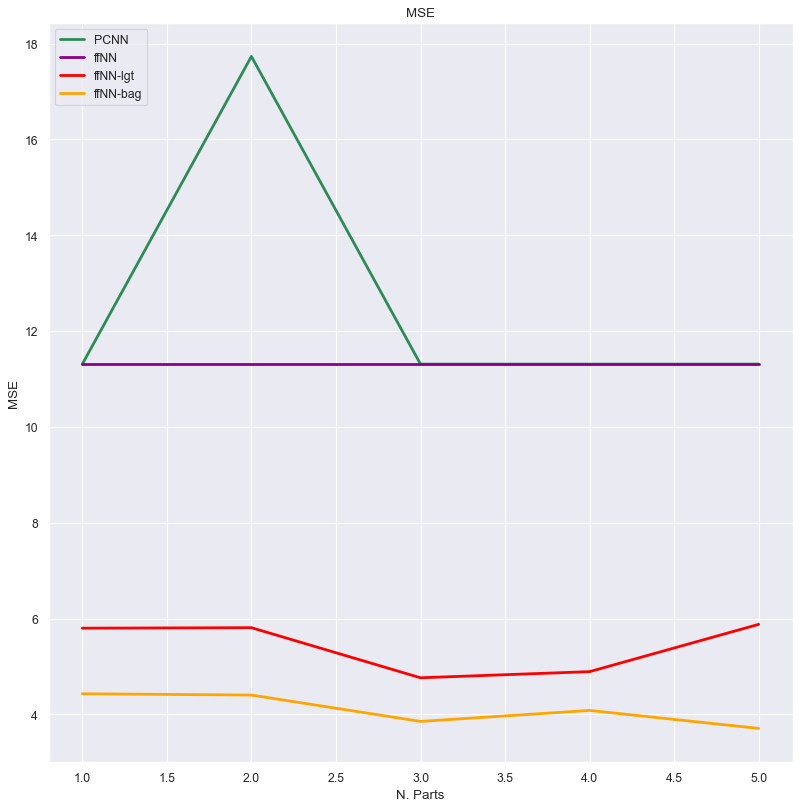

In [17]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("MSE")
plt.xlabel("N. Parts")
plt.ylabel("MSE")

# Generate Plots #
#----------------#
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         performance_Architope_history_report_MSE_test,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         MSE_ffNN,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         performance_lgt_ffNN_report_MSE_test,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         performance_PCNN_ffNN_bag_report_MSE_test,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)
# Add Legend
plt.legend(loc="upper left")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Ablation_MSE_test___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

## MAE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


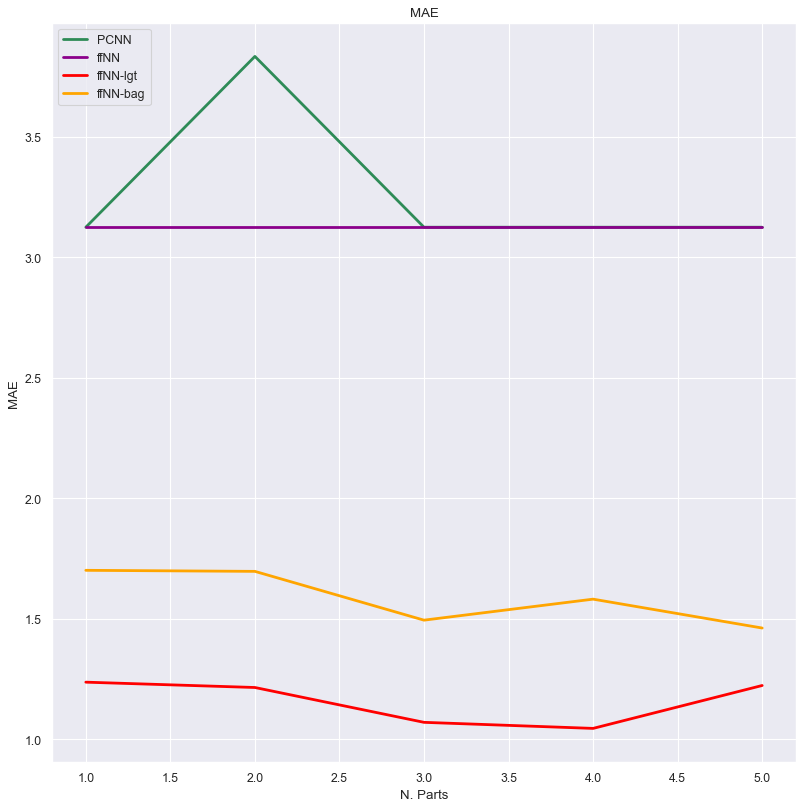

In [18]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("MAE")
plt.xlabel("N. Parts")
plt.ylabel("MAE")

# Generate Plots #
#----------------#
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         performance_Architope_history_report_MAE_test,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         MAE_ffNN,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         performance_lgt_ffNN_report_MAE_test,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         performance_PCNN_ffNN_bag_report_MAE_test,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)

# Export #
#--------#
# SAVE Figure to .eps
plt.legend(loc="upper left")
plt.savefig('./outputs/plotsANDfigures/Ablation_MAE___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

# L-Time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


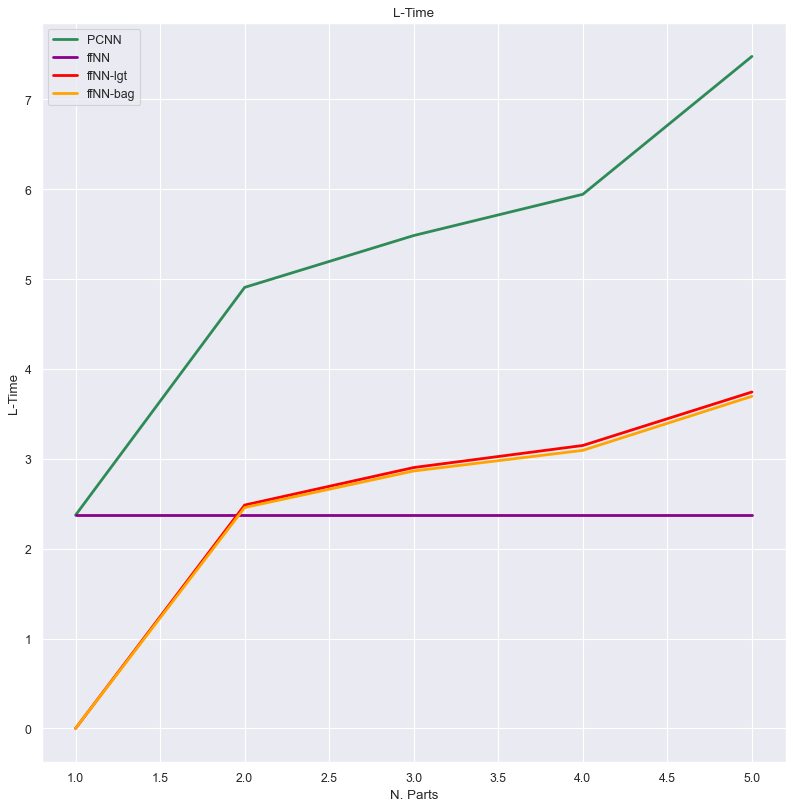

In [19]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("L-Time")
plt.xlabel("N. Parts")
plt.ylabel("L-Time")

# Generate Plots #
#----------------#
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         L_Times,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         L_times_ffNN_plot,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         L_time_PCNN_lgt,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         L_time_PCNN_bag,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)
plt.legend(loc="upper left")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Ablation_L_Time___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

# P-Times

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


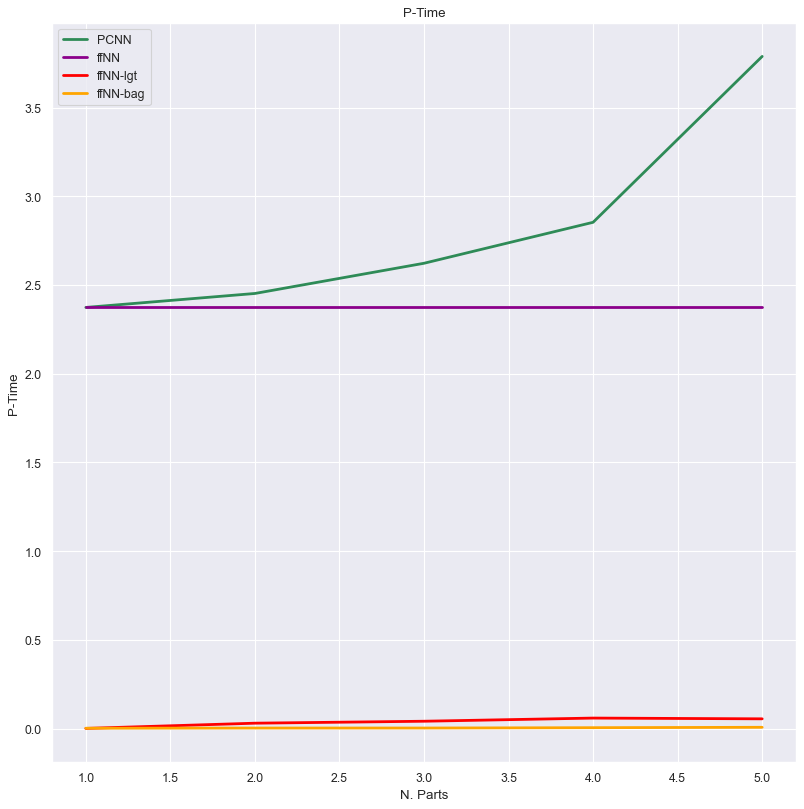

In [20]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("P-Time")
plt.xlabel("N. Parts")
plt.ylabel("P-Time")

# Generate Plots #
#----------------#
# Plot Signal
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         P_Times,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         P_times_ffNN_plot,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         P_time_PCNN_lgt,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         P_time_PCNN_bag,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)
plt.legend(loc="upper left")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Ablation_P_Time___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

## N-Params

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


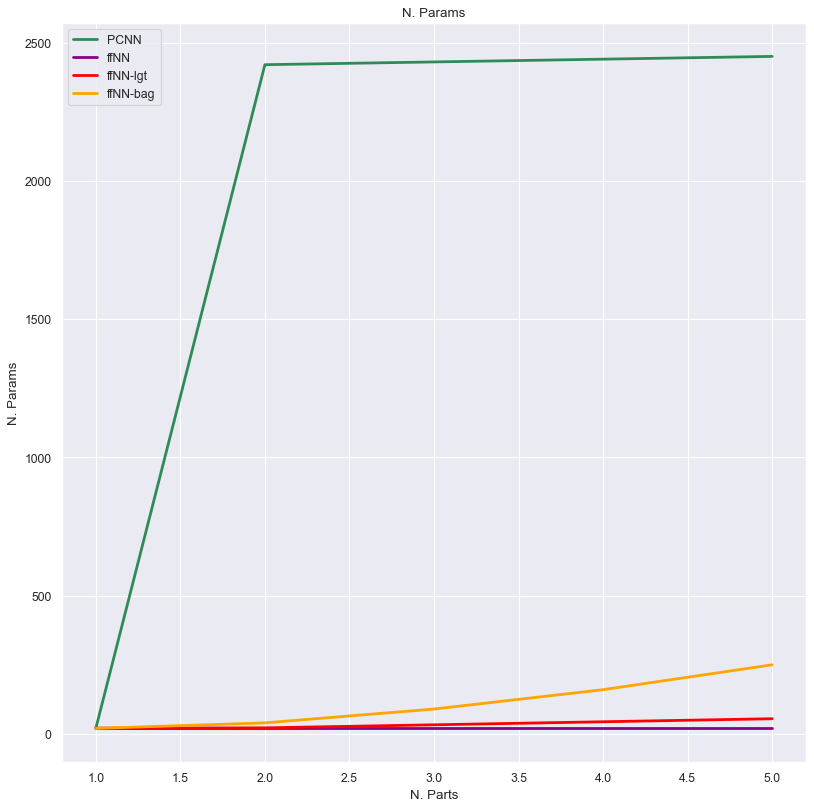

In [21]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("N. Params")
plt.xlabel("N. Parts")
plt.ylabel("N. Params")

# Generate Plots #
#----------------#
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_Params,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_neurons_ffNN,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_params_PCNN_logistic_hist,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_params_PCNN_ffNN_bag,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)
plt.legend(loc="upper left")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Ablation_N_Params___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

# Number of Active Neurons Per Input

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


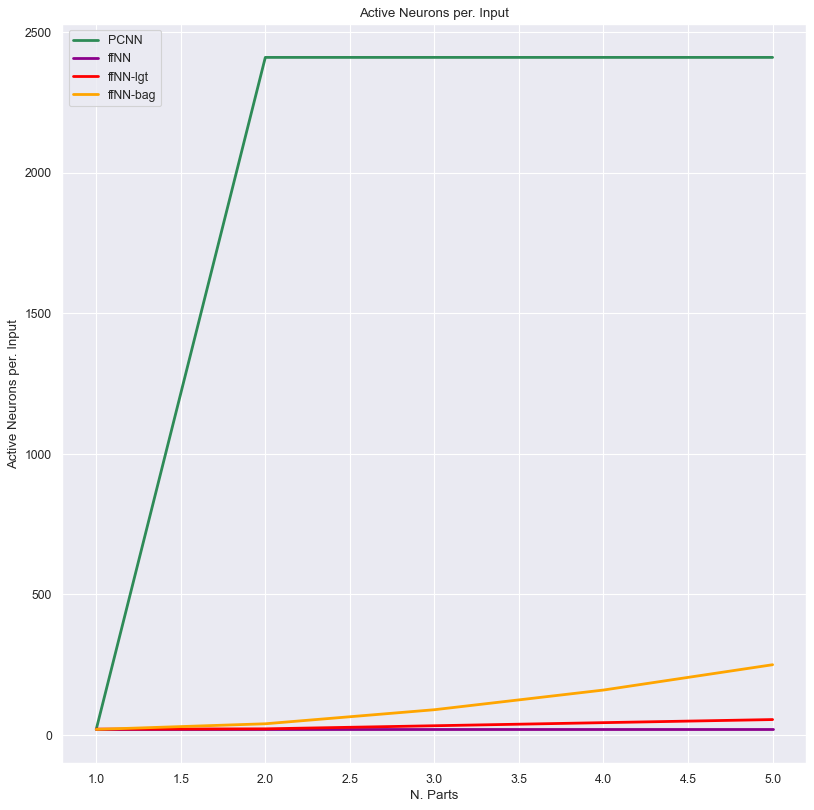

In [22]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("Active Neurons per. Input")
plt.xlabel("N. Parts")
plt.ylabel("Active Neurons per. Input")

# Generate Plots #
#----------------#
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_neurons_per_input,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_neurons_ffNN,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_params_PCNN_logistic_hist_per_input,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         N_params_PCNN_ffNN_bag_per_input,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)
plt.legend(loc="upper left")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Ablation_Active_Neurons_per_input___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

# Mean Widths for Sub-Pattern Networks

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


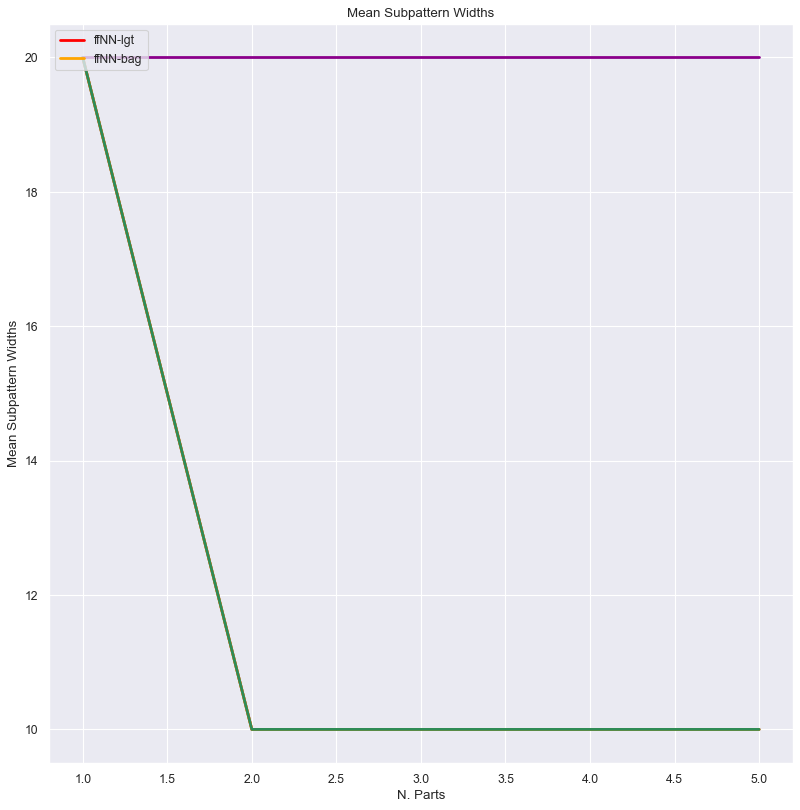

In [23]:
sns.set()
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
# Format Plot #
#-------------#
plt.title("Mean Subpattern Widths")
plt.xlabel("N. Parts")
plt.ylabel("Mean Subpattern Widths")

# Generate Plots #
#----------------#
# Plot Signal
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         mean_subpattern_widths_hist,
         label = 'ffNN-lgt',
         color='red',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         mean_subpattern_widths_hist,
         label = 'ffNN-bag',
         color='orange',
         linewidth=2.5)
plt.legend(loc="upper left")
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         mean_subpattern_widths_hist,
         label = 'PCNN',
         color='seagreen',
         linewidth=2.5)
plt.plot(N_parts_Generated_by_Algo_2_history_report,
         Width_neurons_ffNN,
         label = 'ffNN',
         color='darkmagenta',
         linewidth=2.5)


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Ablation_Mean_Widths___'+str(Option_Function)+'__Fix_Neurons_Q'+str(Tied_Neurons_Q)+'.eps')
plt.show()

# Table(s)

In [24]:
for j in range(3):
    print('---------------------')
print('Prediction Metric(s)')
for j in range(3):
    print('---------------------')
print(predictive_performance_test)
for j in range(3):
    print(' ')
for j in range(3):
    print('---------------------')
print('Model Complexitie(s)')
for j in range(3):
    print('---------------------')
print(training_times_In_Line)
print(training_times_Parallel)

---------------------
---------------------
---------------------
Prediction Metric(s)
---------------------
---------------------
---------------------
               MAE        MSE       MAPE
ffNN      3.125508  11.309522        inf
GBRF      0.437993   0.371069  48.102996
ffNN-bag  1.701577   4.429049  74.133857
ffNN-lgt  1.237387   5.798490  34.933710
PCNN      3.125508  11.309522        inf
 
 
 
---------------------
---------------------
---------------------
Model Complexitie(s)
---------------------
---------------------
---------------------
                   ffNN   GBRF  ffNN-Bag  ffNN-log   PCNN
In-Line (L-Time)  2.374  1.129     0.002     0.001  2.374
                  ffNN GBRF  ffNN-Bag  ffNN-log   PCNN
Parallel (P-Time)    -    -     0.002     0.001  2.374


---

---

---

# Fin

---

---

---